# Entrega 1: Ejercicio 1. Parte 2.

**Asignatura**: Machine Learning, 2025/2026

**Profesora**: Raquel Martinez España

**Máster de Inteligencia Artificial**
**Autores:**  
- Jesús Guirado Pérez  
- Antonio Luis Sánchez Torres  
- Víctor Emilio Vicente García

# Índice
1. [Introducción](#introduccion)
   1. [Problema](#problema)
   2. [Metodología](#metodologia)
2. [Análisis del dataset y preprocesamiento básico](#dataset)
   1. [Tratamiento de variables categoricas](#dummies)
   2. [Tratamiento de nulos](#nulos)
3. [Estrategias de Evaluación](#evaluacion)
4. [Modelos linea Base](#linea-base)
   1. [Árbol de decision](#arbol-decision)
   2. [Random Forest](#random-forest)
   3. [AdaBoost](#adaboost)
5. [Estrategias de preprocesado avanzado](#preprocesado)
   1. [Valores atípicos](#atipicos)
6. [Entrenamiento con preprocesado](#entrenamiento-1)
   1. [Árbol de decisión](#arbol-decision-1)
   2. [Random Forest](#random-forest-1)
   3. [AdaBoost](#adaboost)
7. [Selección de características](#seleccion-caracteristicas)
    1.  [Árbol de decisión](#arbol-decision-2)
    2.  [Random Forest](#random-forest-2)
    3.  [AdaBoost](#adaboost-2)
8.  [Búsqueda de hyper parámetros](#hyperparametros)
    1.  [Árbol de decisión](#arbol-decision-3)
    2.  [Random Forest](#random-forest-3)
    3.  [AdaBoost](#adaboost-3)
9.  [Búsqueda de hyper parámetros sin selección de características](#hyper-sin)
    1.  [Árbol de decisión](#arbol-decision-4)
    2.  [Random Forest](#random-forest-4)
    3.  [AdaBoost](#adaboost-4)
10. [Comparativa de resultados final](#comparativa)
11. [Conclusión](#conclusion)
    
 [Uso de IA Generativa](#ia-generativa)

 [Entorno de Ejecución](#entorno)

# Introducción <a class="anchor" id="introduccion"></a>
La consejería de educación nos ha pedido realizar un análisis sobre la prevención del bullying. Tenemos como tarea crear un sistema fiable de predicción del bullyinng en base a dos datasets.

## Problema <a class="anchor" id="problema"></a>
Este problema es una continuación de la Parte 1, sigue siendo un problema de clasificación binaria entre dos clases, sufre bullying o no sufre bullying. En este caso la consegería nos ha dado un nuevo dataset con más datos. Además de generar un clasificador binario que ayude en la toma de decisiones y prevención del bullying, hay que generar un informe que puedan entender personal no técnico, subrallando entre otros las variables más importantes para resolver el problema.

## Metodología <a class="anchor" id="metodologia"></a>
En este proyecto seguiremos la misma metodología que en la parte anterior, pero como descubriremos más adelante sin balanceo de datos. Seguiremos el siguiente flujo, definición del problema, análisis exploratorio del dataset, preprocesamiento básico de los datos y entrenamiento de modelos de linea base, definición de estrategia de evaluación, preprocesado avanzado de los datos, selección de características, búsqueda de hiperparámetros y comparación y elección del modelo definitivo:
1. **Análisis del dataset y preprocesamiento básico**. Distribución de variables numéricas y categóricas, porcentaje de valores nulos, presencia de ruido o inconsistencias, correlaciones y balance entre clases. Este análisis permite orientar las estrategias de limpieza, transformación y selección de características que se aplicarán posteriormente, junto con el tratamiento de valores nulos, normalización o codificación de variables categóricas.
2. **Definición de estrategia de evaluación.** Con la caracterízación del problema podemos definir que métricas y que estrategia seguiremos para evaluar los modelos.
3. **Entrenamiento de modelos de linea base.** Una vez tenemos el dataset preparado y una estrategia de evaluación, seleccionaremos una serie de modelos para entrenar con los parámetros por defecto para tener una línea base de resultados. 
4. **Preprocesado avanzado de los datos.** En esta fase analizaremos valores fuera de rango y que estrategia utilizaremos para resolver esto.
5. **Selección de características e importancia de las características.** Una parte importante del problema es determinar que características son más importantes para resolver el problema. Puede ser esencial para poder optimizar los recursos de la consejería en obtener esas métricas y no las que sean menos importantes. Tambien analizaremos si esto mejora los resultados.
6. **Búsqueda de hiperparámetros.** En esta etapa entrenaremos los modelos haciendo un ajuste de hyperparámetros para preparar el resultado final
7. **Comparación y elección del mejor modelo.** Por último compararémos todos los modelos y los resultados obtenidos, además de entrenar el modelo final.

# Análisis del dataset y preprocesamiento básico <a class="anchor" id="dataset"></a>
En este apartado vamos a cargar y analizar el dataset, tambien vamos a compararlo con el dataset anterior.

In [50]:
#librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#Semilla establecida
semilla=123
np.random.seed(semilla)
RUTA_BASE_DATOS = './Bullying/'

# ==============================================================================
# Cargamos la base de datos de bullying.csv
# ==============================================================================
url1 = ( RUTA_BASE_DATOS + 'Bullying1.csv')
bullying1 = pd.read_csv(url1, sep=',')
# Cargamos la base de datos de bullying2.csv
# ==============================================================================
url2 = ( RUTA_BASE_DATOS + 'Bullying2.csv')
bullying2 = pd.read_csv(url2, sep=',')
# Damos un vistazo rápido sobre cómo está construido el dataset en las primeras 3 filas
bullying2.head(3)


,Edad,Horas_Sueno,Notas_Promedio,Numero_Amigos,Tiempo_Videojuegos,Tiempo_Redes,Actividades_Extracurr,Ausencias_Escolares,Autoestima,Ansiedad,Depresion,Conflictos_Familiares,Tiempo_Internet,Actividad_Fisica,Genero,Tipo_Centro,Sufre_Bullying
0,15.0,6.0,5.5,12.0,1.7,6.0,3,12,1.9,5.7,0.7,2,3.7,0.5,Femenino,Publico,No
1,16.0,6.8,5.2,2.0,3.4,0.9,3,10,8.6,8.7,9.4,9,5.8,6.6,Femenino,Publico,Si
2,14.0,8.5,3.5,9.0,0.5,6.1,4,0,8.8,4.7,6.2,1,6.2,1.5,Femenino,Privado,No


Podemos ver que el dataset contiene 17 variables al igual que el dataset anterior. Contiene varias variables numéricas con números enteros y números decimales. Tambien contiene 3 columnas con valores de texto, `Genero`, `Tipo_Centro` y `Sufre_Bullying`. Además la variable objetivo sería `Sufre_Bullying`. Las otras dos variables `Genero` y `Tipo_Centro` tienen ambas solo 2 valores posibles, en el caso del primero sería `Femenino` y `Masculino`. Y la otra variable tendría los valores `Publico` y `Privado`.

In [51]:
len(bullying2)

2512

El nuevo dataset contiene 2512 valores, 512 valores más que el dataset anterior. Esto puede ser relevante ya que se ha incrementado el número de datos en un 25% y puede afectar significativamente en el resultado de nuestros modelos.

In [52]:
bullying2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Edad                   2387 non-null   float64
 1   Horas_Sueno            2512 non-null   float64
 2   Notas_Promedio         2512 non-null   float64
 3   Numero_Amigos          2387 non-null   float64
 4   Tiempo_Videojuegos     2512 non-null   float64
 5   Tiempo_Redes           2512 non-null   float64
 6   Actividades_Extracurr  2512 non-null   int64  
 7   Ausencias_Escolares    2512 non-null   int64  
 8   Autoestima             2512 non-null   float64
 9   Ansiedad               2512 non-null   float64
 10  Depresion              2512 non-null   float64
 11  Conflictos_Familiares  2512 non-null   int64  
 12  Tiempo_Internet        2512 non-null   float64
 13  Actividad_Fisica       2512 non-null   float64
 14  Genero                 2512 non-null   object 
 15  Tipo

En cuento a valores nulos tenemos 125 valores nulos en las columnas Edad y Número de amigos, en el dataset anterior teníamos 100 datos nulos en las mismas columnas.

In [53]:
from collections import Counter

# Contamos los valores de cada clase de la variable objetivo
counter = Counter(bullying2["Sufre_Bullying"])
print(counter)

Counter({'No': 1304, 'Si': 1208})


Este dataset está balanceado a diferencia del dataset anterior, este tiene 1308 entradas con valor No en `Sufre_Bullying` y 1208 con valor Si en esa columna objetivo. Tenemos un ratio de 52/48 aproximadamente. Con estos valores podemos considerar que nuestro dataset es un dataset balanceado.

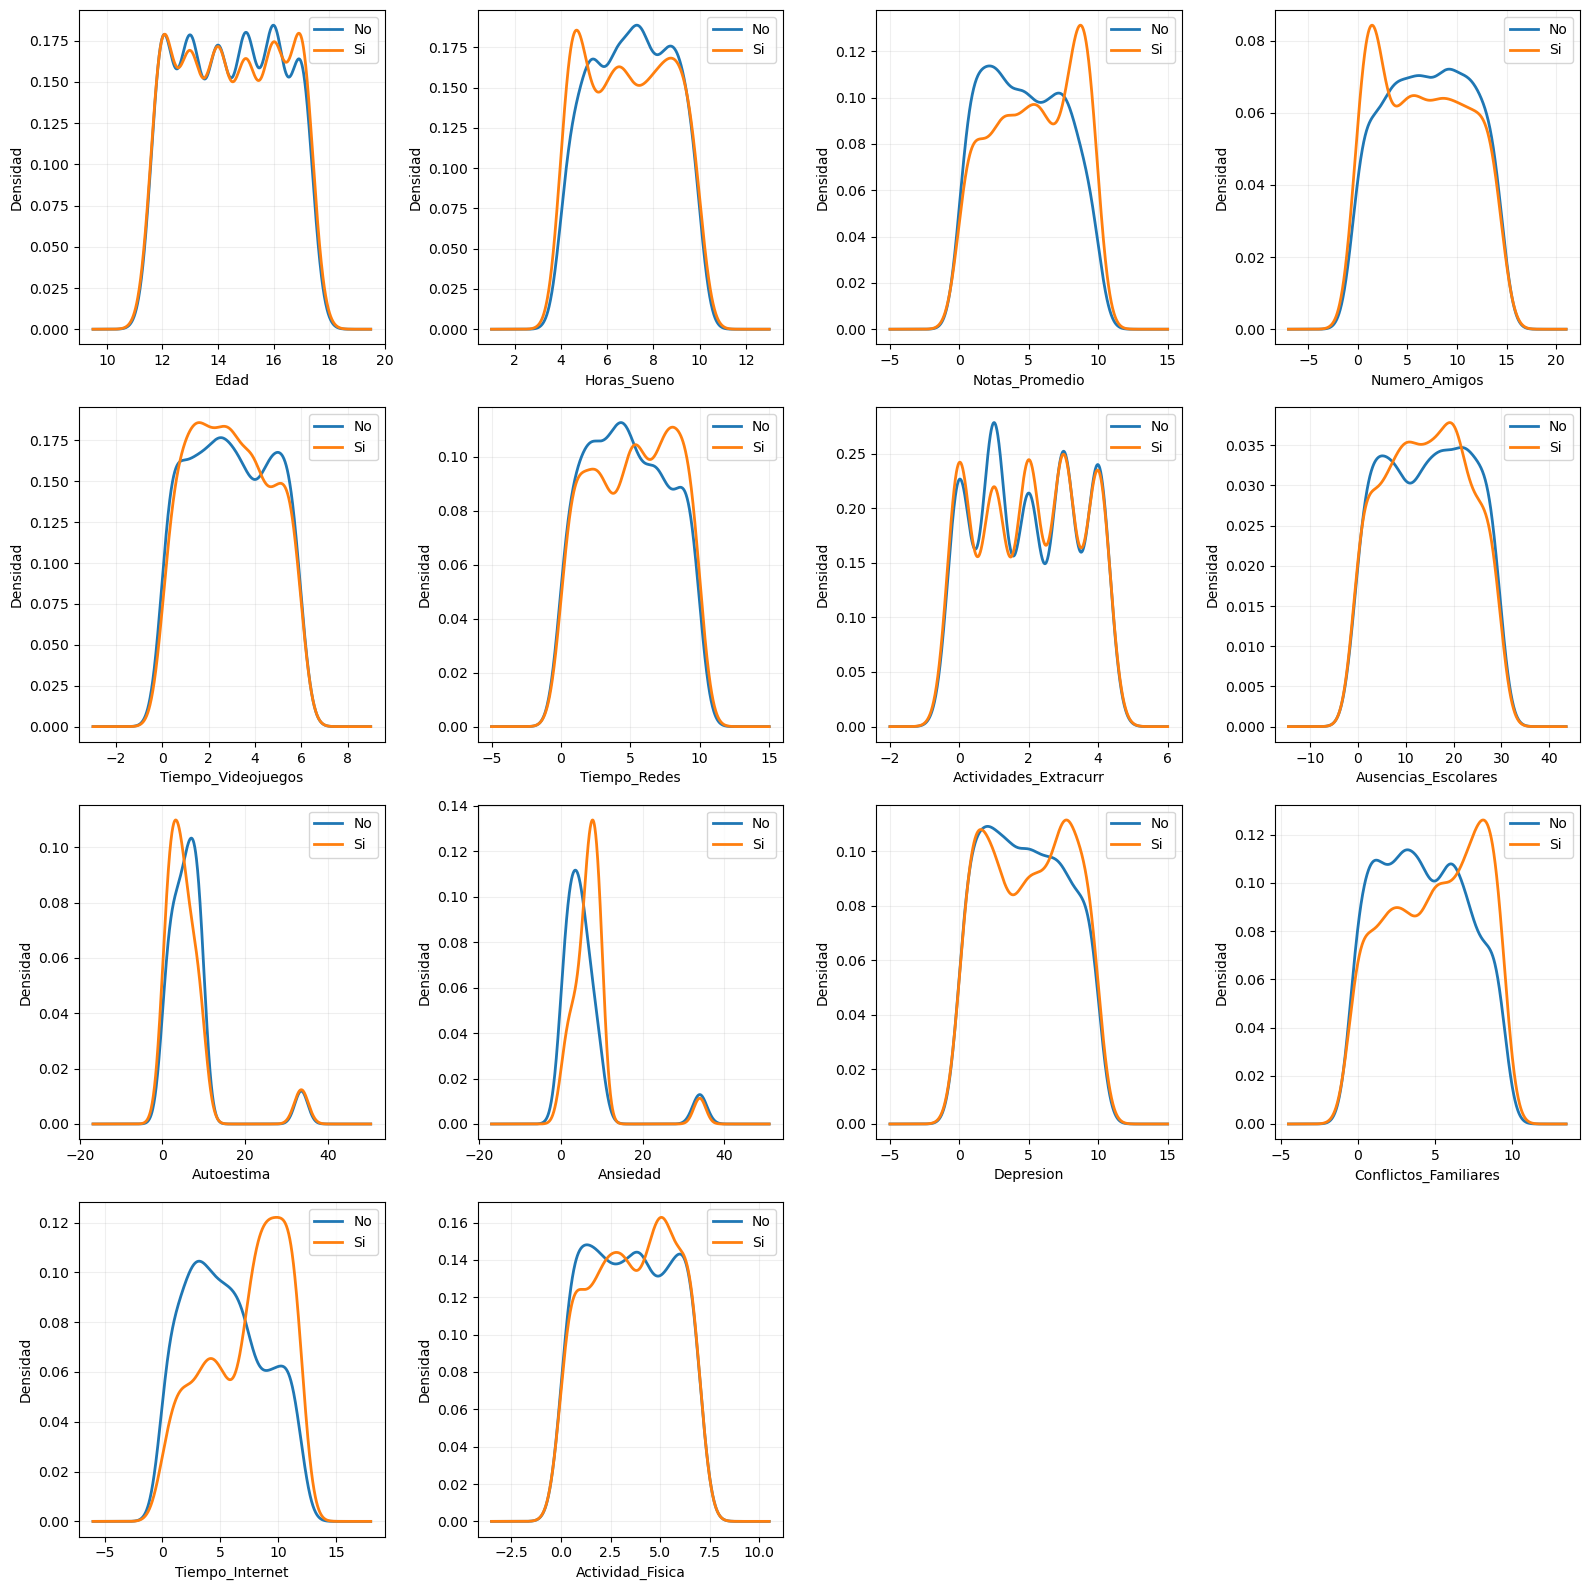

In [54]:
fig, axes = plt.subplots(4,4, figsize=(16, 16))
for i in range(4):
    for j in range(4):
        if(i*4 + j >= len(bullying2.select_dtypes(include=[np.number]).columns)):
            axes[i][j].axis('off')
            continue
        col = bullying2.select_dtypes(include=[np.number]).columns[i*4 + j]
        for label in bullying2["Sufre_Bullying"].unique():
            data = bullying2[bullying2["Sufre_Bullying"] == label][col]
            data.plot.kde(ax=axes[i][j], label=label, linewidth=2)
    
        axes[i][j].set_xlabel(col)
        axes[i][j].set_ylabel("Densidad")
        axes[i][j].legend()
        axes[i][j].grid(alpha=0.2)
plt.tight_layout()
plt.show()

Hay variables cuya distribución varía bastante dependiendo de si se trata de un caso de bullying o no, esto nos pude dar pistas a futuro sobre las variables más interesantes en nuestro problema y de si podemos imputar según que valores atendiendo a la clase en la que se clasifican o no es necesario.

## Tratamiento de variables categóricas <a class="anchor" id="dummies"></a>
Para las variables categóricas como solo tienen dos valores vamos a aplicar una codificación dummy, vamos a sustituir estas columnas por columnas con valores booleanos que representen ausencia o presencia de una de las categorías, como son binarias, la ausencia de la categoría elegida significará la presencia de la otra categoría. Esta codificación se realizó de la misma forma en el apartado anterior.

In [55]:
#Seleccionamos las columnas categóricas y las mostramos
categoricas_anterior = bullying1.select_dtypes(include = ["object", "category"]).columns

categoricas_Datos_anterior = pd.get_dummies(bullying1[categoricas_anterior], drop_first = True)

bullying1.drop(categoricas_anterior, axis = 1, inplace = True)
# Tras eliminar los atributos originales, concatenamos los nuevos atributos creados para las variables categóricas.
bullying1 = pd.concat([bullying1, categoricas_Datos_anterior], axis = 1)

categoricas = bullying2.select_dtypes(include = ["object", "category"]).columns

#Transformamos las categóricas a dummies, eliminando la primera columna de cada variable categórica, haciendo que desaparezca la colinealidad, combinación lineal de varias columnas para formar otra.

categoricas_Datos = pd.get_dummies(bullying2[categoricas], drop_first = True)

bullying2.drop(categoricas, axis = 1, inplace = True)

bullying2 = pd.concat([bullying2, categoricas_Datos], axis = 1)

## Tratamiento de nulos <a class="anchor" id="nulos"></a>
Para tratar los nulos de las variables `Edad` y `Numero_Amigos`, hemos decidido imputar la mediana del dataset. La mediana es un valor más resistente al ruido o los puntos fuera de rango. La otra opción que hemos valorado sería la imputación por clase, pero con esto añadimos un sesgo de clase a las imputaciones que podría ser erróneo. En cualquier caso esta práctica añade valores que no existían e idealmente contactaríamos con la consejería para preguntar que podría estar pasando. también hemos valorado la eliminación de las entradas con nulos, pero por el tamaño del dataset y porque esas entradas tienen valores por lo general coherentes en el resto de las características, hemos decidido mantenerlas e imputar la mediana del dataset.

In [56]:
from sklearn.impute import SimpleImputer
# strategy=median porque utilizamos la mediana
imputer = SimpleImputer(strategy="median")
# seleccionamos las columnas con nulos, las cuales queremos calcular su mediana y sustituir los nulos por
nulos = ["Edad", "Numero_Amigos"]

# Sustituimos las columnas elegidas, calculando la mediana con fit y cambiando los nulos por con el valor de fit utilizando transform
bullying1[nulos] = imputer.fit_transform(bullying1[nulos])
bullying2[nulos] = imputer.fit_transform(bullying2[nulos])

## Varianza <a class="anchor" id="varianza"></a>

In [57]:
# Calculamos la variedad de valores que hay en cada una de las columnas, cuanto mayor sea, mayor variedad y más grande sera su varianza
varianza_anterior = bullying1.var()

varianza = bullying2.var()
varianza

Edad                      2.844594
Horas_Sueno               2.994051
Notas_Promedio            8.460677
Numero_Amigos            17.542071
Tiempo_Videojuegos        2.924311
Tiempo_Redes              8.272878
Actividades_Extracurr     1.997570
Ausencias_Escolares      73.823079
Autoestima               46.520459
Ansiedad                 46.691234
Depresion                 8.534462
Conflictos_Familiares     8.181373
Tiempo_Internet          12.200729
Actividad_Fisica          4.146101
Genero_Masculino          0.250084
Tipo_Centro_Publico       0.250092
Sufre_Bullying_Si         0.249734
dtype: float64

Analizando los datos, aunque no hay ninguna variable a 0, hay 2 variables que se quedan muy próximas a 0 como "Genero_Masculino" y "Tipo_Centro_Publico", igual que en el dataset anterior. De nuevo hay que tener en cuenta que estas dos variables solo pueden tomar dos valores, "True" o "False", por lo que al no haber mucha variedad de valores en estas variables, se quedan muy próximas a 0.

In [58]:
diferencias = varianza - varianza_anterior
diferencias.sort_values(ascending=False)

Ansiedad                 0.609067
Notas_Promedio           0.218349
Conflictos_Familiares    0.216601
Tiempo_Redes             0.189679
Tiempo_Internet          0.174519
Numero_Amigos            0.112196
Depresion                0.066136
Horas_Sueno              0.053423
Edad                     0.029211
Sufre_Bullying_Si        0.021524
Tipo_Centro_Publico      0.000039
Genero_Masculino        -0.000025
Actividades_Extracurr   -0.001029
Actividad_Fisica        -0.031582
Tiempo_Videojuegos      -0.037252
Autoestima              -0.460885
Ausencias_Escolares     -0.706634
dtype: float64

Si comparamos los datos con el dataset anterior solo vemos grandes cambios en las variables de ``Ansiedad``, ``Numero_Amigos``, ``Ausencias_Escolares`` y ``Autoestima``. Aun así la variación no es demasiado grande entre 7 décimas y 4 décimas.

## Tabla de correlación <a class="anchor" id="correlacion"></a>

Vamos a continuación a estudiar cómo se relacionan las variables en el nuevo dataset y si hay algún valor destacable o diferente con el dataset anterior.

In [59]:
# Hacemos una matriz de correlación y visualizaremos sobre nuestra columna objetivo cuáles columnas parecen ser la más influyentes, para luego entrenar nuestro modelo e intentar predecir 
matriz_correlacion_anterior = bullying1.corr()
matriz_correlacion = bullying2.corr()
# Visualizaremos de mayor a menor
matriz_correlacion["Sufre_Bullying_Si"].sort_values(ascending=False)

Sufre_Bullying_Si        1.000000
Tiempo_Internet          0.256170
Conflictos_Familiares    0.124018
Notas_Promedio           0.121140
Ansiedad                 0.114457
Tiempo_Redes             0.057241
Depresion                0.036814
Actividad_Fisica         0.030802
Edad                     0.008165
Actividades_Extracurr    0.004119
Tiempo_Videojuegos      -0.006595
Tipo_Centro_Publico     -0.013332
Ausencias_Escolares     -0.015024
Genero_Masculino        -0.038550
Horas_Sueno             -0.040387
Autoestima              -0.052622
Numero_Amigos           -0.063355
Name: Sufre_Bullying_Si, dtype: float64

En cuanto a la correlación se aprecian varios cambios de correlación con respecto al dataset anterior, `Conflictos_Familiares` ha aumentado su correlación y ha pasado a ser la segunda variable más correlacionada.

In [60]:
diferencias = matriz_correlacion["Sufre_Bullying_Si"].sort_values(ascending=False) - matriz_correlacion_anterior["Sufre_Bullying_Si"].sort_values(ascending=False)
diferencias.sort_values(ascending=False)

Conflictos_Familiares    0.042464
Tiempo_Internet          0.034054
Autoestima               0.023188
Horas_Sueno              0.013404
Actividad_Fisica         0.011442
Actividades_Extracurr    0.010104
Ansiedad                 0.006577
Numero_Amigos            0.006046
Tiempo_Redes             0.005197
Depresion                0.003881
Tiempo_Videojuegos       0.003546
Notas_Promedio           0.003061
Sufre_Bullying_Si        0.000000
Ausencias_Escolares     -0.002828
Tipo_Centro_Publico     -0.011271
Edad                    -0.021592
Genero_Masculino        -0.041029
Name: Sufre_Bullying_Si, dtype: float64

``Tiempo_Internet`` ha aumentado en 3 centésimas, ``Conflictos_Familiares`` ha aumentado en 4 centésimas y ha pasado de ser el cuarto valor a ser el segundo. Notas_Promedio y Ansiedad también han aumentado ligeramente. Los mayores cambios se ven en Conflictos_Familiares, Tiempo_Internet y Genero_Masculino que ahora está menos correlacionada que en el dataset anterior.

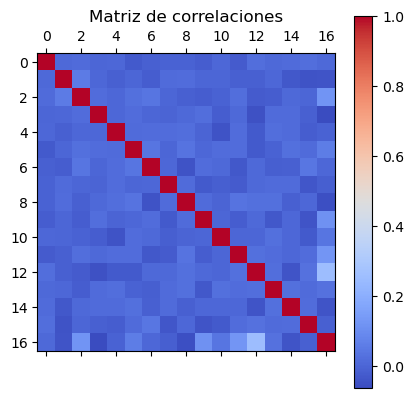

In [61]:
# Mediante un mapa de calor analizamos la matriz de correlación donde los colores van de azul a rojo, dependiendo del grado de correlación entre variables
plt.matshow(bullying2.corr(), cmap="coolwarm")
# Añadimos el título "Matriz de correlaciones"
plt.title("Matriz de correlaciones")
# Añadimos una barra de color como leyenda
plt.colorbar()
# Mostramos la gráfica
plt.show()

En cuanto  la matriz de correlación no se ven apenas cambios con el anterior, no se aprecian fuertes correlaciones entre ninguna variable con otro.

# Estrategias de Evaluación <a class="anchor" id="evaluacion"></a>

Como en el dataset anterior vamos a entrenar un modelo simple, Decision Tree y dos modelos esamble, Random Forest y AdaBoost(formado con árboles de decisión), dividiremos nuestro dataset en train y test con 80/20 respectivamente, analizaremos su fiabilidad analizando con validación cruzada con cv = 5 a partir de los datos de train, y finalmente analizaremos su overfitting para saber si hemos sobreentrenado o no. Hemos utilizado las mismas funciones auxiliares del dataset anterior para obtener las métricas.

``obtencion_metricas_clasificacion(Entradas, modelo, Salidas_verdaderas)``: En esta función pasaremos el conjunto de datos test sin sus etiquetas, nuestro modelo ya entrenado, y las etiquetas del conjunto test. Esta función nos retornará e imprimirá en pantalla, la exactitud, precisión, sensibilidad y f1 de cada modelo.

In [62]:
# Importamos la clase matriz confusión 
# Importación de los métodos requeridos
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
# Importante poner para que se muestren los gráficos
%matplotlib inline
# Definimos una función para utilizarla posteriormente

def obtencion_metricas_clasificacion(Entradas, modelo, Salidas_verdaderas):
    '''Obtención de las métricas de clasificación'''
    # Salidas predichas por el modelo y las salidas verdaderas
    Salidas_predichas = modelo.predict(Entradas)
    # Matriz de confusión para visualizar aciertos y errores, ordenada primero con los falsos y segundo con los verdaderos
    labels = [False, True]
    matriz_confusion = confusion_matrix(Salidas_verdaderas, Salidas_predichas, labels=labels)
    print("La matriz de confusión es:")
    print(matriz_confusion)

    # Métricas que analizaremos en nuestros modelos
    exactitud = accuracy_score(Salidas_verdaderas, Salidas_predichas)
    precision = precision_score(Salidas_verdaderas, Salidas_predichas)
    sensibilidad_recall = recall_score(Salidas_verdaderas, Salidas_predichas)
    puntuacion_f1 = f1_score(Salidas_verdaderas, Salidas_predichas)

    # Cantidad de decimales que tendrá cada impresión
    digitos = 4
    print("La exactitud es: ")
    print(round(exactitud,digitos))
    print("La precisión es:")
    print(round(precision,digitos))
    print("La sensibilidad es:")
    print(round(sensibilidad_recall,digitos))
    print("La puntuación F1 es:")
    print(round(puntuacion_f1,digitos))

    return exactitud, precision, sensibilidad_recall, puntuacion_f1

``print_scores(scores, dígitos=4)``: En esta función la utilizaremos para imprimir la media de los valores que nos devuelve el diccionario de cross_validate, función que utilizamos para analizar la validación cruzada de nuestros modelos. El parámetro scores es el diccionario y dígitos es la cantidad de números que queremos imprimir, redondeado a la última cifra.

In [63]:
def print_scores(scores, digitos=4):
        print("La exactitud media es:", round(scores['test_accuracy'].mean(), digitos), "con desviación típica media de:", round(np.std(scores['test_accuracy']), digitos))
        print("La precisión media es:", round(scores['test_precision'].mean(), digitos), "con desviación típica media de:", round(np.std(scores['test_precision']), digitos))
        print("La sensibilidad media es:", round(scores['test_recall'].mean(), digitos), "con desviación típica media de:", round(np.std(scores['test_recall']), digitos))
        print("La puntuación F1 media es:", round(scores['test_f1'].mean(), digitos), "con desviación típica media de:", round(np.std(scores['test_f1']), digitos))

Analizaremos la fiabilidad de los modelos con validación cruzada así evitamos la dependencia de la semilla. también utilizaremos la misma estrategia de validación cruzada y métricas, prestando mayor atención a la sensibilidad que es la que nos reduce los falsos negativos.

Para el overfitting usaremos también una función auxiliar "print_overfitting" en la cual le pasamos el resultado de la validación cruzada (diccionario) entrenado con training y lo restamos con el test predicho del modelo que hemos entrenado, que será el mismo modelo en ambos casos, haciendo así que si esta función nos devuelve negativos no habrá overfitting, y cuando más valor positivo devuelva, más overfitting habrá en nuestro modelo.

In [64]:
def print_overfitting(scores_val, scores_test, digitos=4):
    print("El overfitting en la exactitud es:", round(scores_val['test_accuracy'].mean() - scores_test[0], digitos))
    print("El overfitting en la precision es:", round(scores_val['test_precision'].mean() - scores_test[1], digitos))
    print("El overfitting en la sensibilidad es:", round(scores_val['test_recall'].mean() - scores_test[2], digitos))
    print("El overfitting en la f1 es:", round(scores_val['test_f1'].mean() - scores_test[3], digitos))

# Modelos de Linea base <a class="anchor" id="linea-base"></a>

Con este procesado básico ya podemos comparar los modelos que usamos en la parte anterior con esta. Vamos a utilizar la misma estrategia de elección de set de entrenamiento y de prueba para hacer una comparación coherente con el dataset anterior.

In [65]:
#Importamos varias librerias que podrían ayudarnos a la hora de seguir con nuestros modelos
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, RepeatedStratifiedKFold
#Dividimos en "X" todas las columnas menos la variable objetivo, y en "y" la característica objetivo
X=bullying2.drop("Sufre_Bullying_Si", axis=1)
y=bullying2["Sufre_Bullying_Si"]
# Dividimos en train(80%) y test(20%) con la semilla establecida desde el principio, para tener una reproducción fija para mejorar nuestros modelos, además de stratify para que se haga una división lo más "balanceada" posible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=semilla, stratify=y)

## Decision Tree <a class="anchor" id="decision-tree"></a>

Volvemos a usar el árbol de decisión como el modelo simple, es un modelo fácil de explicar, que no necesita normalización y sencillo.

In [66]:
# Importamos la librería del árbol de decisiones, más específicamente, la parte del clasificador
from sklearn.tree import DecisionTreeClassifier
# Utilizamos los hiperparámetros por defecto, con la semilla establecida para reproducibilidad
treeC = DecisionTreeClassifier(
            max_depth         = None,
            criterion         = 'gini',
            random_state      = semilla
          )
# Entrenamos el árbol de decisión utilizando el fit, con las variables X_train, que contiene todas las columnas excepto la objetivo, e y_train, que contiene las etiquietas de esos datos
treeC.fit(X_train, y_train)
# Imprimimos la profundidad del árbol de decisiones
print(f"Profundidad del árbol: {treeC.get_depth()}")
# Analizamos el número de nodos terminales
print(f"Número de nodos terminales: {treeC.get_n_leaves()}")

Profundidad del árbol: 17
Número de nodos terminales: 201


In [67]:
# Analizamos los resultados del modelo de árbol de decisiones con el conjunto de datos test y sus etiquetas
scoresDTBasico = obtencion_metricas_clasificacion(X_test, treeC, y_test)

La matriz de confusión es:
[[209  52]
 [ 45 197]]
La exactitud es: 
0.8072
La precisión es:
0.7912
La sensibilidad es:
0.814
La puntuación F1 es:
0.8024


### Comparación de Métricas

| Métrica         | Nuevos datos         |       Datos Anteriores |
|-----------------|----------------------|------------------------|
| **Exactitud**   | 0.8072               | **0.8300**             |
| **Precisión**   | **0.7912**           | 0.7589                 |
| **Sensibilidad**| **0.8140**           | 0.7589                 |
| **F1-Score**    | **0.8024**           | 0.7589                 |

Los nuevos datos consiguen mejores resultados en todas las métricas salvo en Exactitud, en base a esto podemos decir que el modelo con más datos predice más casos reales de bullying (verdaderos positivos), esto se puede ver en números comparando las matrices de confusión, este modelo consigue 197 verdaderos positivos mientras que el modelo anterior predecía 107. Aunque ahora tengamos solo un 25% más de datos hemos detectado un 84% más de verdaderos positivos. 

In [68]:
# Aplicamos validación cruzada, con 5 folds, sacando la métrica recall (sensibilidad), accuracy, precision y f1
scores = cross_validate(treeC, X_train, y_train, cv=5, scoring=['recall', 'accuracy', 'precision', 'f1'])
# Imprimimos las medias de la validacion cruzada realizada con el conjunto de entrenamiento
print_scores(scores)

La exactitud media es: 0.8278 con desviación típica media de: 0.0152
La precisión media es: 0.827 con desviación típica media de: 0.0238
La sensibilidad media es: 0.8126 con desviación típica media de: 0.0086
La puntuación F1 media es: 0.8196 con desviación típica media de: 0.0137


Analizando la posibilidad de overfitting con validación cruzada, hemos visto que las desviaciones típicas son de entre 0.8% y un 2.3%. Son desviaciones típicas bastante pequeñas, el modelo parece ser robusto. Además, en la métrica de sensibilidad es donde la desviación típica es más pequeña con solo 0.8%. Nuestro modelo no es dependiente de cómo se realice la división de set de train y test.

In [69]:
print_overfitting(scores, scoresDTBasico)

El overfitting en la exactitud es: 0.0206
El overfitting en la precision es: 0.0358
El overfitting en la sensibilidad es: -0.0014
El overfitting en la f1 es: 0.0171


Los valores de overfitting son proximos a cero entre 3.5% y -0.14%. Obteniendo el modelo mejores resultados para sensibilidad en test que en train.

## Random Forest <a class="anchor" id="random-forest"></a>

Aquí también usaremos Random Forest como nuestro primer ensamble, podemos verlo como un paso natural de los árboles de decisión. Ya que se basa en utilizar muchos de estos árboles. Esto también nos va a beneficiar para calcular la importancia de las características en siguientes secciones.

In [70]:
from sklearn.ensemble import RandomForestClassifier

# Creación del modelo Random Forest con los parámetros por defecto, pero de forma balanceada, puesto que como hemos visto hay un desbalance de datos
rf = RandomForestClassifier(
            n_estimators = 100,
            criterion    = 'gini',
            max_depth    = None,
            max_features = 'sqrt',
            class_weight ='balanced',
            random_state = semilla
         )

# Entrenamos Random Forest con los datos de entrenamiento y sus etiquetas
rf.fit(X_train, y_train)

# Analizamos los resultados de Random Forest con el conjunto de datos test y sus etiquetas
scoresRFBasico = obtencion_metricas_clasificacion(X_test, rf, y_test)

La matriz de confusión es:
[[204  57]
 [ 24 218]]
La exactitud es: 
0.839
La precisión es:
0.7927
La sensibilidad es:
0.9008
La puntuación F1 es:
0.8433


### Comparación de Métricas

| Métrica         | Nuevos datos         |       Datos Anteriores |
|-----------------|----------------------|------------------------|
| **Exactitud**   | **0.839**            | 0.8275                 |
| **Precisión**   | **0.7927**           | 0.7857                 |
| **Sensibilidad**| **0.9008**           | 0.7021                 |
| **F1-Score**    | **0.8433**           | 0.7416                 |

En este caso, todas las métricas son mucho mejores que las obtenidas con el set de datos anterior en el mismo paso, destaca mucho la sensibilidad ahora predecimos 218 verdaderos positivos con un 90% de sensibilidad, lo cual a priori es una muy buena métrica. En el dataset anterior predecíamos 99 verdaderos positivos con una sensibilidad de 70%. En este punto podríamos asegurar que el nuevo dataset beneficia mucho a esta técnica, particularmente por su balanceo de datos desde el inicio. En el dataset anterior vimos que cuando balanceábamos los datos este modelo se veía muy beneficiado.

In [71]:
# Aplicamos validación cruzada, con 5 folds, sacando la métrica recall (sensibilidad), accuracy, precision y f1
scores = cross_validate(rf, X_train, y_train, cv=5, scoring=['recall', 'accuracy', 'precision', 'f1'])
# Imprimimos las medias de la validacion cruzada realizada con el conjunto de entrenamiento
print_scores(scores)

La exactitud media es: 0.8761 con desviación típica media de: 0.011
La precisión media es: 0.8367 con desviación típica media de: 0.0116
La sensibilidad media es: 0.9223 con desviación típica media de: 0.0154
La puntuación F1 media es: 0.8774 con desviación típica media de: 0.0112


Analizando los resultados con validación cruzada vemos que el modelo es consistente consiguiendo una desviación típica de entre 1.1% y 1.5%. No presenta cambios derivados de la semilla en como dividimos nuestro dataset.

In [72]:
print_overfitting(scores, scoresRFBasico)

El overfitting en la exactitud es: 0.0371
El overfitting en la precision es: 0.044
El overfitting en la sensibilidad es: 0.0215
El overfitting en la f1 es: 0.034


En cuanto al overfitting, esta técnica es más potente que el árbol de decisión y presenta algo más de overfitting. Entre un 4.4% y un 2.1%. Siendo la menor diferencia en la medida de sensibilidad. Aún no es una diferencia demasiado preocupante.

## AdaBoost <a class="anchor" id="adaboost"></a>

Igual que antes vamos a usar AdaBoost con el modelo de arbol de decisión que hemos creado anteriormente.

In [73]:
from sklearn.ensemble import AdaBoostClassifier
# Creamos Adaboost a partir del árbol de decisiones que hemos creado anteriormente
adaboost = AdaBoostClassifier(
    treeC, learning_rate = 1.0, n_estimators=50, random_state=semilla
)

# Entrenamos Adaboost con los datos de entrenamiento y sus etiquetas
adaboost.fit(X_train, y_train)

# Evaluamos Adaboost con el conjunto de datos test y sus etiquetas
scoresAdaBasico =  obtencion_metricas_clasificacion(X_test, adaboost, y_test)

La matriz de confusión es:
[[207  54]
 [ 47 195]]
La exactitud es: 
0.7992
La precisión es:
0.7831
La sensibilidad es:
0.8058
La puntuación F1 es:
0.7943


### Comparación de Métricas

| Métrica         | Nuevos datos         |       Datos Anteriores |
|-----------------|----------------------|------------------------|
| **Exactitud**   | 0.7992               | **0.8225**             |
| **Precisión**   | **0.7831**           | 0.7431                 |
| **Sensibilidad**| **0.8058**           | 0.7589                 |
| **F1-Score**    | **0.7943**           | 0.7509                 |

En este caso volvemos a mejorar la sensibilidad, pero en la exactitud conseguimos una métrica peor. 

In [74]:
# Aplicamos validación cruzada, con 5 folds, sacando la métrica recall (sensibilidad), accuracy, precision y f1
scores = cross_validate(adaboost, X_train, y_train, cv=5, scoring=['recall', 'accuracy', 'precision', 'f1'])
# Imprimimos las medias de la validacion cruzada realizada con el conjunto de entrenamiento
print_scores(scores)

La exactitud media es: 0.8263 con desviación típica media de: 0.0176
La precisión media es: 0.8291 con desviación típica media de: 0.0238
La sensibilidad media es: 0.8054 con desviación típica media de: 0.02
La puntuación F1 media es: 0.8169 con desviación típica media de: 0.0176


Este modelo tampoco presenta grandes desviaciones típicas dependientes de como dividamos los datos. 

In [75]:
print_overfitting(scores, scoresAdaBasico)

El overfitting en la exactitud es: 0.0271
El overfitting en la precision es: 0.046
El overfitting en la sensibilidad es: -0.0004
El overfitting en la f1 es: 0.0226


Tampoco presenta overfitting significativo. Tenemos cambios de entre -0.04% y 4.6% en las métricas entre train y test. Valores pequeños, algunos de ellos incluso despreciables como el -0.04%. 

En general podemos decir que los modelos se adaptan mejor al nuevo dataset. Esto sin realizar ningún cambio importante sobre el dataset. En la siguiente sección realizaremos un preprocesado mayor sobre el dataset para intentar obtener mejores resultados.

# Estrategias de preprocesado avanzado <a class="anchor" id="preprocesado"></a>

Ahora continuamos con nuestro preprocesado, analizando valores atípicos o selección de características.

## Valores atípicos <a class="anchor" id="atipicos"></a>

Sospechamos que hay ciertos valores atípicos, en concreto en las variables de `Ansiedad` y `Autoestima`, estas variables presentaban en la gráfica de densidad unos valores cercanos a 30 que no parecen corresponderse con valores reales.

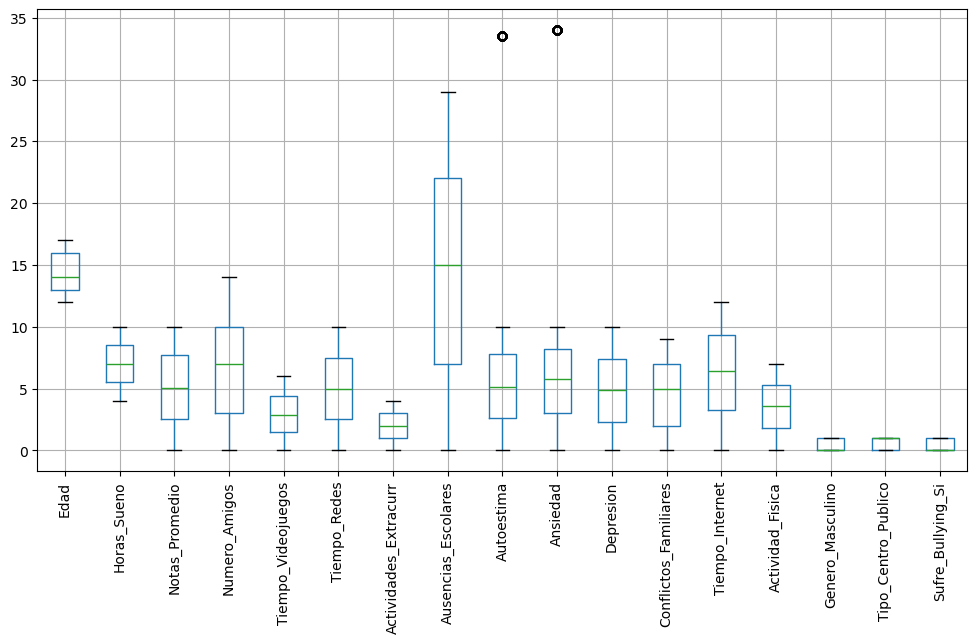

In [76]:
# Aumenta el tamaño del boxplot de la figura
bullying2.boxplot(figsize=(12,6))
# Rotamos los nombres en el eje x a 90º
plt.xticks(rotation=90)
# Muestra la gráfica
plt.show()

Como con el dataset anterior, tenemos valores extraños en las variables de `Autoestima` y `Ansiedad`.

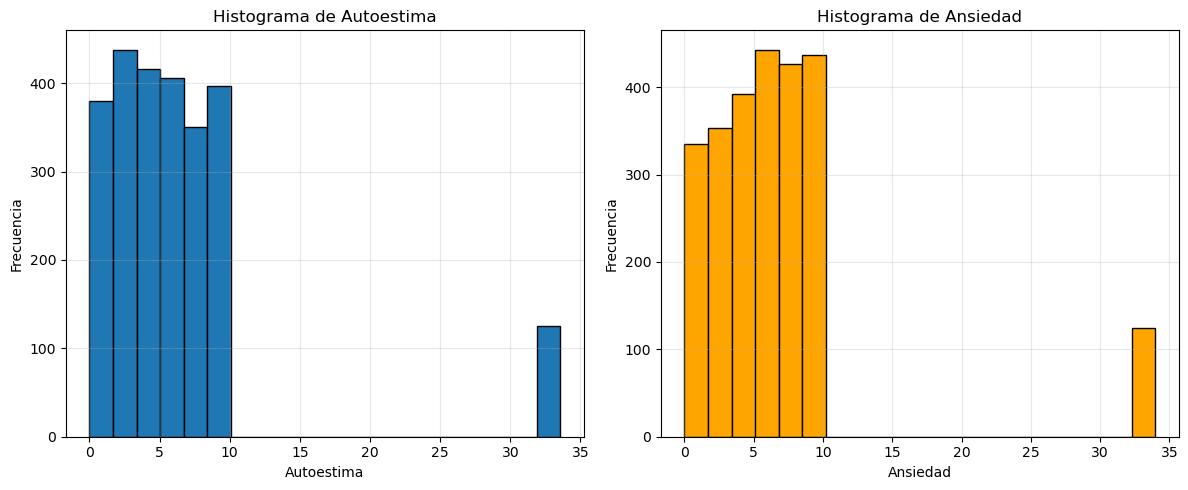

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Histograma de Autoestima
plt.subplot(1,2,1)
plt.hist(bullying2['Autoestima'], bins=20, edgecolor='black')
plt.title("Histograma de Autoestima")
plt.xlabel("Autoestima")
plt.ylabel("Frecuencia")
plt.grid(alpha=0.3)

# Histograma de Ansiedad
plt.subplot(1,2,2)
plt.hist(bullying2['Ansiedad'], bins=20, edgecolor='black', color='orange')
plt.title("Histograma de Ansiedad")
plt.xlabel("Ansiedad")
plt.ylabel("Frecuencia")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

Como se muestra en los histogramas, hay un valor que se sale de lo esperado. Mirando el dataset, podemos comprobar que, para ``Autoestima``, el valor es 33.557282403870644 en los 125 datos en los que aparece, y para ``Ansiedad`` es 33.97737557364086. Estos datos parecen erróneos; idealmente, contactaríamos con quien recopiló la información para aclarar qué representan estos valores.

Parece claro que no deberían estar en nuestro dataset, podrían representar nulos o quizá un valor como “10”. Vamos a tratarlos como nulos e imputarlos con la mediana, que es el valor más fiable. Esto podría introducir cierto sesgo si, en realidad, los datos originales tuvieran valores muy diferentes a la mediana.

También podríamos imputarlos con la mediana por clase, pero consideramos que esto introduciría un sesgo aún mayor, ya que estas variables presentan distribuciones con centros distintos entre clases, y podría dar pie a que los modelos usaran directamente ese valor para clasificarlas en una clase u otra.

Intentamos, por tanto, que los modelos utilicen otras características junto con ``Autoestima`` y ``Ansiedad``, y que no se basen únicamente en los valores que aparezcan en esas columnas.

<Axes: >

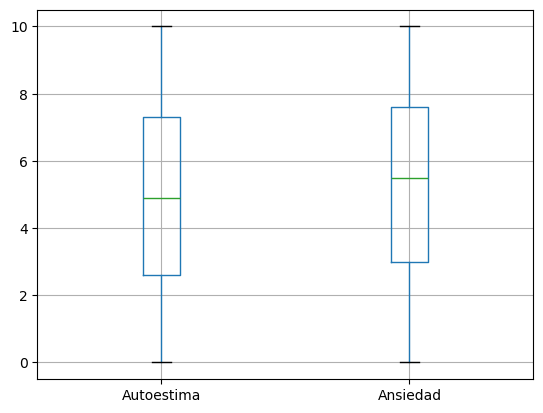

In [78]:
bullying2.loc[bullying2['Autoestima'] > 10, 'Autoestima'] = np.nan
bullying2.loc[bullying2['Ansiedad'] > 10, 'Ansiedad'] = np.nan
nulos = ["Autoestima", "Ansiedad"]
bullying2[nulos] = imputer.fit_transform(bullying2[nulos])
bullying2.boxplot(['Autoestima', 'Ansiedad'])


Ahora podemos ver que esas columnas están entre 0 y 10, comparemos como ha afectado esto a la correlación.

In [79]:
matriz_correlacion_outliers = bullying2.corr()
# Visualizaremos de mayor a menor
matriz_correlacion_outliers["Sufre_Bullying_Si"].sort_values(ascending=False)

Sufre_Bullying_Si        1.000000
Ansiedad                 0.353223
Tiempo_Internet          0.256170
Conflictos_Familiares    0.124018
Notas_Promedio           0.121140
Tiempo_Redes             0.057241
Depresion                0.036814
Actividad_Fisica         0.030802
Edad                     0.008165
Actividades_Extracurr    0.004119
Tiempo_Videojuegos      -0.006595
Tipo_Centro_Publico     -0.013332
Ausencias_Escolares     -0.015024
Genero_Masculino        -0.038550
Horas_Sueno             -0.040387
Numero_Amigos           -0.063355
Autoestima              -0.160404
Name: Sufre_Bullying_Si, dtype: float64

Podemos ver como esto ha cambiado mucho la correlación de los valores de Ansiedad y Autoestima con la variable objetivo, tanto en positivo Ansiedad como en negativo Autoestima.

In [80]:
diferencia = matriz_correlacion_outliers["Sufre_Bullying_Si"] - matriz_correlacion["Sufre_Bullying_Si"]
diferencia[["Ansiedad", "Autoestima"]]

Ansiedad      0.238766
Autoestima   -0.107781
Name: Sufre_Bullying_Si, dtype: float64

``Ansiedad`` ha aumentado su correlación en 2 décimas, mientras que autoestima ha aumentado su correlación inversa en una décima. Ahora son las primera y tercera variable más correlacionada con la variable objetivo. además de ``Tiempo_Internet``, ``Conflictos_Familiares`` y ``Notas_Promedio``. Esto nos reafirma en la sensación de que los valores estaban mal indicados y que realmente deberían de estar entre 0 y 10.

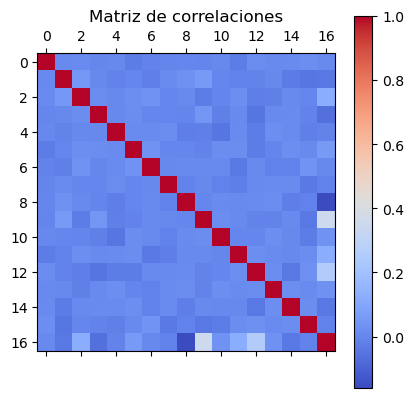

In [81]:
# Mediante un mapa de calor analizamos la matriz de correlación donde los colores van de azul a rojo, dependiendo del grado de correlación entre variables
plt.matshow(bullying2.corr(), cmap="coolwarm")
# Añadimos el título "Matriz de correlaciones"
plt.title("Matriz de correlaciones")
# Añadimos una barra de color como leyenda
plt.colorbar()
# Mostramos la gráfica
plt.show()

Se puede ver ahora que la variable más negativamente relacionada con la variable objetivo ahora aparece en un azul más oscuro igual que la variable más positivamente correlacionada ha cambiado. Se corresponden con ``Autoestima`` y ``Ansiedad``.

# Entrenamiento con preprocesado avanzado <a class="anchor" id="entrenamiento-1"></a>

Despues de aplicar la imputación de outlier volvemos a entrenar nuestros modelos para ver qué resultados obtiene ahora.

In [82]:
X =bullying2.drop("Sufre_Bullying_Si", axis=1)
y =bullying2["Sufre_Bullying_Si"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=semilla, stratify=y)


## Decision Tree <a class="anchor" id="arbol-decision-1"></a>

In [83]:
# Importamos la librería del árbol de decisiones, más específicamente, la parte del clasificador
from sklearn.tree import DecisionTreeClassifier
# Utilizamos los hiperparámetros por defecto, con la semilla establecida para reproducibilidad
treeC = DecisionTreeClassifier(
            max_depth         = None,
            criterion         = 'gini',
            random_state      = semilla
          )
# Entrenamos el árbol de decisión utilizando el fit, con las variables X_train, que contiene todas las columnas excepto la objetivo, e y_train, que contiene las etiquietas de esos datos
treeC.fit(X_train, y_train)
# Imprimimos la profundidad del árbol de decisiones
print(f"Profundidad del árbol: {treeC.get_depth()}")
# Analizamos el número de nodos terminales
print(f"Número de nodos terminales: {treeC.get_n_leaves()}")

Profundidad del árbol: 15
Número de nodos terminales: 205


In [84]:
# Analizamos los resultados del modelo de árbol de decisiones con el conjunto de datos test y sus etiquetas
scoresDTOutliers = obtencion_metricas_clasificacion(X_test, treeC, y_test)

La matriz de confusión es:
[[204  57]
 [ 44 198]]
La exactitud es: 
0.7992
La precisión es:
0.7765
La sensibilidad es:
0.8182
La puntuación F1 es:
0.7968


### Comparación de Métricas

| Métrica         | Nuevos datos         |       Datos Anteriores |
|-----------------|----------------------|------------------------|
| **Exactitud**   | 0.7992               | **0.8300**             |
| **Precisión**   | **0.7765**           | 0.7552                 |
| **Sensibilidad**| **0.8182**           | 0.766                  |
| **F1-Score**    | **0.7968**           | 0.7606                 |

Igual que en el paso anterior el árbol de decisión mejora métricas salvo en exactitud. La matriz de confusión muestra menos verdaderos positivos que en el dataset anterior, lo cual puede dar el resultado de que no consiga mejorar el resultado de exactitud. 

In [85]:
# Aplicamos validación cruzada, con 5 folds, sacando la métrica recall (sensibilidad), accuracy, precision y f1
scores = cross_validate(treeC, X_train, y_train, cv=5, scoring=['recall', 'accuracy', 'precision', 'f1'])
# Imprimimos las medias de la validacion cruzada realizada con el conjunto de entrenamiento
print_scores(scores)

La exactitud media es: 0.8153 con desviación típica media de: 0.0102
La precisión media es: 0.8176 con desviación típica media de: 0.0221
La sensibilidad media es: 0.794 con desviación típica media de: 0.0191
La puntuación F1 media es: 0.8053 con desviación típica media de: 0.0101


El modelo parece bastante sólido con una desviación típica entre 1% y 2.2% más que el modelo con el dataset anterior que estaba entre 2.3% y 5.6%. también muestra los mismos resultados parecidos a la línea base con este dataset sin preprocesado avanzado. que estaba entre 0.8% y 2.3%

In [86]:
print_overfitting(scores, scoresDTOutliers)

El overfitting en la exactitud es: 0.0161
El overfitting en la precision es: 0.0412
El overfitting en la sensibilidad es: -0.0242
El overfitting en la f1 es: 0.0085


En cuanto a sobreajustes el modelo parece sobre ajustar más que en la versión sin preprocesado que estaba entre 3.5% y -0.14%, mientras que ahora tenemos una métrica de 4.1% de precisión sobre ajustada. En cuanto al dataset anterior este conseguía ligeramente mejores resultados en test que en train, por lo que no presentaría sobre ajustes.

## Random Forest <a class="anchor" id="random-forest-1"></a>

In [87]:
from sklearn.ensemble import RandomForestClassifier

# Creación del modelo Random Forest con los parámetros por defecto, pero de forma balanceada, puesto que como hemos visto hay un desbalance de datos
rf = RandomForestClassifier(
            n_estimators = 100,
            criterion    = 'gini',
            max_depth    = None,
            max_features = 'sqrt',
            class_weight ='balanced',
            random_state = semilla
         )

# Entrenamos Random Forest con los datos de entrenamiento y sus etiquetas
rf.fit(X_train, y_train)

# Analizamos los resultados de Random Forest con el conjunto de datos test y sus etiquetas
scoresRFOutliers = obtencion_metricas_clasificacion(X_test, rf, y_test)

La matriz de confusión es:
[[207  54]
 [ 22 220]]
La exactitud es: 
0.8489
La precisión es:
0.8029
La sensibilidad es:
0.9091
La puntuación F1 es:
0.8527


### Comparación de Métricas

| Métrica         | Nuevos datos         |       Datos Anteriores |
|-----------------|----------------------|------------------------|
| **Exactitud**   | **0.8489**           | 0.8275                 |
| **Precisión**   | **0.8029**           | 0.7571                 |
| **Sensibilidad**| **0.9091**           | 0.7518                 |
| **F1-Score**    | **0.8527**           | 0.7544                 |

En este caso todas las métricas son mejores a las obtenidas con el set de datos anterior, destaca mucho la sensibilidad ahora predecimos 220 verdaderos positivos con un 90% de sensibilidad, lo cual a priori es una muy buena métrica. Mejora en la predicción de 2 verdaderos positivos respecto a los modelos base.

In [88]:
# Aplicamos validación cruzada, con 5 folds, sacando la métrica recall (sensibilidad), accuracy, precision y f1
scores = cross_validate(rf, X_train, y_train, cv=5, scoring=['recall', 'accuracy', 'precision', 'f1'])
# Imprimimos las medias de la validacion cruzada realizada con el conjunto de entrenamiento
print_scores(scores)

La exactitud media es: 0.8761 con desviación típica media de: 0.0109
La precisión media es: 0.8419 con desviación típica media de: 0.0134
La sensibilidad media es: 0.914 con desviación típica media de: 0.016
La puntuación F1 media es: 0.8764 con desviación típica media de: 0.011


Las métricas de validación cruzada dan muy buenos resultados con desviaciones típicas entre 1% y 1.6% lo que muestra que la semilla no influye mucho en como elegimos los dataset de train y test.

In [89]:
print_overfitting(scores, scoresRFOutliers)

El overfitting en la exactitud es: 0.0272
El overfitting en la precision es: 0.039
El overfitting en la sensibilidad es: 0.005
El overfitting en la f1 es: 0.0237


En cuanto al sobre ajuste, el modelo muestra valores de sobre ajuste entre 3.9% y 0.5% no se aprecia suficiente sobreajuste como para descartar el modelo.

## AdaBoost <a class="anchor" id="adaboost"></a>

In [90]:
from sklearn.ensemble import AdaBoostClassifier
# Creamos Adaboost a partir del árbol de decisiones que hemos creado anteriormente
adaboost = AdaBoostClassifier(
    treeC, learning_rate = 1.0, n_estimators=50, random_state=semilla
)

# Entrenamos Adaboost con los datos de entrenamiento y sus etiquetas
adaboost.fit(X_train, y_train)

# Evaluamos Adaboost con el conjunto de datos test y sus etiquetas
scoresAdaOutliers = obtencion_metricas_clasificacion(X_test, adaboost, y_test)

La matriz de confusión es:
[[206  55]
 [ 41 201]]
La exactitud es: 
0.8091
La precisión es:
0.7852
La sensibilidad es:
0.8306
La puntuación F1 es:
0.8072


### Comparación de Métricas

| Métrica         | Nuevos datos         |       Datos Anteriores |
|-----------------|----------------------|------------------------|
| **Exactitud**   | 0.8091               | **0.82**               |
| **Precisión**   | **0.7852**           | 0.7518                 |
| **Sensibilidad**| **0.8306**           | 0.7305                 |
| **F1-Score**    | **0.8072**           | 0.741                  |

Volvemos a mejorar todos los resultados salvo exactitud, que esto se de en tantos modelos puede indicar que la clase mayoritariamente representada del dataset anterior influye bastante en cómo se calculan las métricas. Por otro lado, adaboost mejora las métricas con la versión sin preprocesado.

In [91]:
# Aplicamos validación cruzada, con 5 folds, sacando la métrica recall (sensibilidad), accuracy, precision y f1
scores = cross_validate(adaboost, X_train, y_train, cv=5, scoring=['recall', 'accuracy', 'precision', 'f1'])
# Imprimimos las medias de la validacion cruzada realizada con el conjunto de entrenamiento
print_scores(scores)

La exactitud media es: 0.8208 con desviación típica media de: 0.0082
La precisión media es: 0.8192 con desviación típica media de: 0.0139
La sensibilidad media es: 0.8054 con desviación típica media de: 0.0108
La puntuación F1 media es: 0.8121 con desviación típica media de: 0.0081


Este modelo parece robusto con desviaciones típicas entre 0.8% y 1.3%. La división entre train y test no afecta casi a su desempeño.

In [92]:
print_overfitting(scores, scoresAdaOutliers)

El overfitting en la exactitud es: 0.0117
El overfitting en la precision es: 0.034
El overfitting en la sensibilidad es: -0.0252
El overfitting en la f1 es: 0.0049


En cuanto a overfiiting muestra valores bajos entre -2.5% y 3.4%. La sensibilidad es mejor en test que en train.

# Selección de características <a class="anchor" id="seleccion-caracteristicas"></a>

Las variables con la correlación más baja serían ``Edad``, ``Actividades_Extracurr`` y ``Tiempo_Videojuegos``. Estas variables no parecen aportar demasiada diferenciación a nuestro dataset. `Actividades_Extracurr` coincide siendo una de las variables menos correlacionadas en el dataset anterior, mientras que ``Edad`` y `Tiempo_Videojuegos`, aunque no eran las menos correlacionadas tampoco tenían un gran peso. Aun así, vamos a ver con una eliminación recursiva de características cuales son las más importantes. A priori descartaríamos las de menor correlación y nos quedaríamos con las de mayor correlación. Pero vamos a validarlo con el método de reducción recursiva de características. 

In [93]:
rf = RandomForestClassifier(random_state=semilla)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [101]:
importancias = pd.DataFrame({
    "Característica": X.columns,
    "Importancia": rf.feature_importances_
})
importancias.sort_values(by="Importancia", ascending=False)


,Característica,Importancia
9,Ansiedad,0.215209
12,Tiempo_Internet,0.143028
8,Autoestima,0.103528
2,Notas_Promedio,0.078336
5,Tiempo_Redes,0.068643
11,Conflictos_Familiares,0.062271
1,Horas_Sueno,0.057107
3,Numero_Amigos,0.054553
10,Depresion,0.049602
13,Actividad_Fisica,0.040306


Para este Random Forest podemos ver que las 3 características más importantes han sido ``Ansiedad``, ``Tiempo_Internet``, ``Autoestima`` y las 3 características menos importantes han sido ``Actividades_Extracurr``, ``Tipo_Centro_Publico``,``Genero_Masculino``. Las más importantes presentaban un alto nivel de correlación con la variable objetivo mientras que las menos correlacionadas mostraban poca correlación, Aun así por ejemplo Edad no entra en el top 3 menos importantes y sí que estaba en las menos correlacionadas.

A continuación, vamos a hacer un pipeline que elimine recursivamente características y evalúa con una validación cruzada los resultados hasta quedarse con una característica, pintaremos el resultado de sensibilidad y exactitud para cada conjunto de características y así poder ver en qué punto nuestro modelo empieza a fallar drásticamente. Con esto podríamos elegir mediante el método del codo el número de variables relevantes para entrenamiento. Este método nos permite comparar visualmente el resultado con cada cantidad de características y elegir en base a eso el número de características que nos parezca más equilibrado.

Características: 1, Sensibilidad: 0.6263, Exactitud: 0.6804
Características: 2, Sensibilidad: 0.6749, Exactitud: 0.6720
Características: 3, Sensibilidad: 0.7353, Exactitud: 0.7400
Características: 4, Sensibilidad: 0.7695, Exactitud: 0.7383
Características: 5, Sensibilidad: 0.8119, Exactitud: 0.7768
Características: 6, Sensibilidad: 0.8271, Exactitud: 0.7999
Características: 7, Sensibilidad: 0.8403, Exactitud: 0.8241
Características: 8, Sensibilidad: 0.9138, Exactitud: 0.8754
Características: 9, Sensibilidad: 0.9282, Exactitud: 0.8807
Características: 10, Sensibilidad: 0.9227, Exactitud: 0.8819
Características: 11, Sensibilidad: 0.9235, Exactitud: 0.8815
Características: 12, Sensibilidad: 0.9210, Exactitud: 0.8797
Características: 13, Sensibilidad: 0.9217, Exactitud: 0.8804
Características: 14, Sensibilidad: 0.9165, Exactitud: 0.8774
Características: 15, Sensibilidad: 0.9076, Exactitud: 0.8731
Características: 16, Sensibilidad: 0.9231, Exactitud: 0.8810


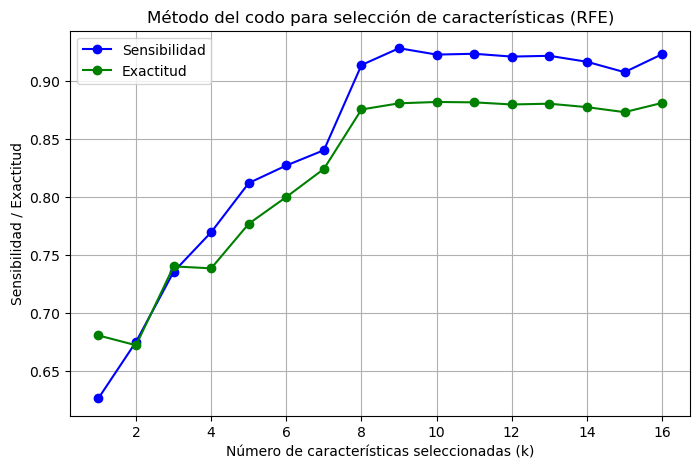

In [104]:
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

resultados_recall = []
resultados_accuracy = []
num_features = []

# Número total de características
total_features = X_train.shape[1]

# Evaluamos desde 1 hasta todas las características
for k in range(1, total_features + 1):

    # RFE seleccionando k características
    rfe = RFE(RandomForestClassifier(random_state=semilla),
              n_features_to_select=k)

    # Pipeline: RFE + random forest
    model = RandomForestClassifier(random_state=semilla)
    pipeline = Pipeline([('rfe', rfe), ('model', model)])

    # Validación cruzada
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=semilla)
    scores = cross_validate(pipeline, X_train, y_train, scoring=['recall','accuracy'], cv=cv, n_jobs=-1)
    resultados_recall.append(np.mean(scores['test_recall']))
    resultados_accuracy.append(np.mean(scores['test_accuracy']))
    num_features.append(k)

    print(f"Características: {k}, Sensibilidad: {np.mean(scores['test_recall']):.4f}, Exactitud: {np.mean(scores['test_accuracy']):.4f}")
# --- Gráfica del método del codo ---
plt.figure(figsize=(8,5))
plt.plot(num_features, resultados_recall, color='blue', marker='o')
plt.plot(num_features, resultados_accuracy, color='green', marker='o')
plt.xlabel("Número de características seleccionadas (k)")
plt.ylabel("Sensibilidad / Exactitud")
plt.legend(["Sensibilidad", "Exactitud"])
plt.title("Método del codo para selección de características (RFE)")
plt.grid(True)
plt.show()

En la gráfica se puede ver que en 8 características hay un salto de más de un 5% en y despues de esto el resto de variable no añaden tanta discriminación ni en Precisión ni en Sensibilidad

Con 9 características conseguimos el mejor resultado de sensibilidad. De ahí en adelante incluso los resultados dejan de mejorar y se estancan. Entre 8 y 12 características podría ser suficiente para entrenar un buen modelo que generalice y sin añadir ruido de características poco relevantes. Y podemos determinar que esas características deberían de ser las más importantes para generar un nuevo dataset que procese los resultados. Vamos por tanto a elegir 9 características para nuestro entrenamiento. Veamos cuáles son esas características y filtremos nuestro dataset para usarlas. 


In [161]:
n_features_to_select = 9
rfe = RFE(RandomForestClassifier(random_state=semilla), n_features_to_select=n_features_to_select)
rfe.fit(X_train, y_train)


from operator import itemgetter
features = X_train.columns.to_list()
columns_selected = []
for x, y in (sorted(zip(rfe.ranking_ , features), key=itemgetter(0))):
    if x == 1:
        columns_selected.append(y)
    print(x, y)

1 Horas_Sueno
1 Notas_Promedio
1 Numero_Amigos
1 Tiempo_Redes
1 Autoestima
1 Ansiedad
1 Depresion
1 Conflictos_Familiares
1 Tiempo_Internet
2 Actividad_Fisica
3 Tiempo_Videojuegos
4 Ausencias_Escolares
5 Edad
6 Actividades_Extracurr
7 Tipo_Centro_Publico
8 Genero_Masculino


Vemos que las seis variables descartadas son ``Genero_Masculino``, ``Tipo_Centro_Publico``, ``Actividades_Extracurr``, ``Edad``, ``Ausencias_Escolares``, ``Tiempo_Videojuegos``.  Estas coinciden también con las características menos correlacionadas. Cabe destacar que en comparación con el dataset anterior se han eliminado las mismas características.

In [162]:
bullying2_seleccion = bullying2[columns_selected + ['Sufre_Bullying_Si']]
bullying2_seleccion.head()

,Horas_Sueno,Notas_Promedio,Numero_Amigos,Tiempo_Redes,Autoestima,Ansiedad,Depresion,Conflictos_Familiares,Tiempo_Internet,Sufre_Bullying_Si
0,6.0,5.5,12.0,6.0,1.9,5.7,0.7,2,3.7,False
1,6.8,5.2,2.0,0.9,8.6,8.7,9.4,9,5.8,True
2,8.5,3.5,9.0,6.1,8.8,4.7,6.2,1,6.2,False
3,9.2,6.8,4.0,0.9,3.0,9.3,7.3,9,0.0,False
4,6.6,7.6,2.0,9.6,8.2,2.1,6.8,4,7.4,True


Hemos eliminado las características que no han sido seleccionadas en el paso anterior.

## Entrenamiento de modelos después de aplicar selección de características

Ahora vamos a entrenar los modelos que utilizamos con el primer dataset pero utilizando nuestra nueva selección y preprocesado de las características para el nuevo dataset y compararemos los resultados. Primero realizaremos la misma división entre train y test con la semilla.

In [163]:
from sklearn.model_selection import train_test_split
X=bullying2_seleccion.drop("Sufre_Bullying_Si", axis=1)
y=bullying2_seleccion["Sufre_Bullying_Si"]
# Dividimos en train(80%) y test(20%) con la semilla establecida desde el principio, para tener una reproducción fija para mejorar nuestros modelos, además de stratify para que se haga una división lo más "balanceada" posible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=semilla, stratify=y)

## Decision Tree <a class="anchor" id="arbol-decision-2"></a>

In [164]:
# Importamos la librería del árbol de decisiones, más específicamente, la parte del clasificador
from sklearn.tree import DecisionTreeClassifier
# Utilizamos los hiperparámetros por defecto, con la semilla establecida para reproducibilidad
treeC = DecisionTreeClassifier(
            max_depth         = None,
            criterion         = 'gini',
            random_state      = semilla
          )
# Entrenamos el árbol de decisión utilizando el fit, con las variables X_train, que contiene todas las columnas excepto la objetivo, e y_train, que contiene las etiquietas de esos datos
treeC.fit(X_train, y_train)
# Imprimimos la profundidad del árbol de decisiones
print(f"Profundidad del árbol: {treeC.get_depth()}")
# Analizamos el número de nodos terminales
print(f"Número de nodos terminales: {treeC.get_n_leaves()}")

Profundidad del árbol: 16
Número de nodos terminales: 218


In [165]:
# Analizamos los resultados del modelo de árbol de decisiones con el conjunto de datos test y sus etiquetas
scoresDTSeleccion = obtencion_metricas_clasificacion(X_test, treeC, y_test)

La matriz de confusión es:
[[206  55]
 [ 47 195]]
La exactitud es: 
0.7972
La precisión es:
0.78
La sensibilidad es:
0.8058
La puntuación F1 es:
0.7927



| Métrica         | Actual   |Anterior              |
|-----------------|----------|----------------------|
| **Exactitud**   |0.7972    |**0.825**             |
| **Precisión**   |**0.78**    | 0.763            |
| **Sensibilidad**|**0.8058**| 0.7305           |
| **F1-Score**    |**0.7927**    | 0.7464           | 


La selección de características ha empeorado ligeramente los resultados obtenidos, comparado con el dataset anterior en el mismo paso volvemos a ver que mejoran las métricas salvo en exactitud.


In [166]:
# Aplicamos validación cruzada, con 5 folds, sacando la métrica recall (sensibilidad), accuracy, precision y f1
scores = cross_validate(treeC, X_train, y_train, cv=5, scoring=['recall', 'accuracy', 'precision', 'f1'])
# Imprimimos las medias de la validacion cruzada realizada con el conjunto de entrenamiento
print_scores(scores)

La exactitud media es: 0.8138 con desviación típica media de: 0.0157
La precisión media es: 0.8178 con desviación típica media de: 0.0255
La sensibilidad media es: 0.7899 con desviación típica media de: 0.0218
La puntuación F1 media es: 0.8032 con desviación típica media de: 0.0157


Este modelo también parece robusto con desviaciones típicas medias entre 1.5% y 2.5%. 

In [167]:
print_overfitting(scores, scoresDTSeleccion)

El overfitting en la exactitud es: 0.0166
El overfitting en la precision es: 0.0378
El overfitting en la sensibilidad es: -0.0159
El overfitting en la f1 es: 0.0105


Encuanto a overfitting, la métrica para precisión ha aumentado pero aún se mantienen métricas aceptables entre -1.5% y 3.7%

## Random Forest <a class="anchor" id="random-forest-2"></a>

In [168]:
from sklearn.ensemble import RandomForestClassifier

# Creación del modelo Random Forest con los parámetros por defecto, pero de forma balanceada, puesto que como hemos visto hay un desbalance de datos
# ==============================================================================
rf = RandomForestClassifier(
            n_estimators = 100,
            criterion    = 'gini',
            max_depth    = None,
            max_features = 'sqrt',
            class_weight ='balanced',
            random_state = semilla
         )

# Entrenamos Random Forest con los datos de entrenamiento y sus etiquetas
rf.fit(X_train, y_train)

# Analizamos los resultados de Random Forest con el conjunto de datos test y sus etiquetas
scoresRFSeleccion = obtencion_metricas_clasificacion(X_test, rf, y_test)

La matriz de confusión es:
[[203  58]
 [ 12 230]]
La exactitud es: 
0.8608
La precisión es:
0.7986
La sensibilidad es:
0.9504
La puntuación F1 es:
0.8679



| Métrica         | dataset Actual   | dataset Anterior              |
|-----------------|----------|----------------------|
| **Exactitud**   |**0.8608**|0.84             |
| **Precisión**   |**0.7986**| 0.755            |
| **Sensibilidad**|**0.9504**| 0.8085           |
| **F1-Score**    |**0.8679**| 0.7808           | 

El random forest destaca como el mejor modelo de manera constante y mejora también los resultados del dataset anterior.

In [169]:
# Aplicamos validación cruzada, con 5 folds, sacando la métrica recall (sensibilidad), accuracy, precision y f1
scores = cross_validate(rf, X_train, y_train, cv=5, scoring=['recall', 'accuracy', 'precision', 'f1'])
# Imprimimos las medias de la validacion cruzada realizada con el conjunto de entrenamiento
print_scores(scores)

La exactitud media es: 0.88 con desviación típica media de: 0.0137
La precisión media es: 0.8421 con desviación típica media de: 0.0184
La sensibilidad media es: 0.9244 con desviación típica media de: 0.0217
La puntuación F1 media es: 0.8811 con desviación típica media de: 0.0136


El modelo parece bastante estable con desviaciones típicas entre 1.3% y 2.1%.

In [170]:
print_overfitting(scores, scoresRFSeleccion)

El overfitting en la exactitud es: 0.0192
El overfitting en la precision es: 0.0435
El overfitting en la sensibilidad es: -0.026
El overfitting en la f1 es: 0.0132


Tampoco hay un sobre ajuste destacable con valores entre -2.6% y 4.3%.

## AdaBoost <a class="anchor" id="adaboost-2"></a>

In [171]:
from sklearn.ensemble import AdaBoostClassifier
# Creamos Adaboost a partir del árbol de decisiones que hemos creado anteriormente
adaboost = AdaBoostClassifier(
    treeC, learning_rate = 1.0, n_estimators=50, random_state=semilla
)

# Entrenamos Adaboost con los datos de entrenamiento y sus etiquetas
adaboost.fit(X_train, y_train)

# Evaluamos Adaboost con el conjunto de datos test y sus etiquetas
scoresAdaSeleccion = obtencion_metricas_clasificacion(X_test, adaboost, y_test)

La matriz de confusión es:
[[202  59]
 [ 48 194]]
La exactitud es: 
0.7873
La precisión es:
0.7668
La sensibilidad es:
0.8017
La puntuación F1 es:
0.7838



| Métrica         | dataset Actual   | dataset Anterior |
|-----------------|----------|----------------------|
| **Exactitud**   |0.7873 |**0.8275**             |
| **Precisión**   |**0.7668**| 0.7647            |
| **Sensibilidad**|**0.8017**| 0.7376           |
| **F1-Score**    |**0.7838**| 0.7509           | 

Como ha pasado mucho anteriormente las métricas mejoran salvo en exactitud. Debido al desbalanceo de la primera parte.

In [172]:
# Aplicamos validación cruzada, con 5 folds, sacando la métrica recall (sensibilidad), accuracy, precision y f1
scores = cross_validate(adaboost, X_train, y_train, cv=5, scoring=['recall', 'accuracy', 'precision', 'f1'])
# Imprimimos las medias de la validacion cruzada realizada con el conjunto de entrenamiento
print_scores(scores)

La exactitud media es: 0.8173 con desviación típica media de: 0.0195
La precisión media es: 0.8167 con desviación típica media de: 0.0261
La sensibilidad media es: 0.8002 con desviación típica media de: 0.0148
La puntuación F1 media es: 0.8083 con desviación típica media de: 0.0195


El modelo parece robusto con desviaciones típicas entre 1.4% y 2.6%

In [173]:
print_overfitting(scores, scoresAdaSeleccion)

El overfitting en la exactitud es: 0.03
El overfitting en la precision es: 0.0499
El overfitting en la sensibilidad es: -0.0015
El overfitting en la f1 es: 0.0244


No consideramos que haya overfitting, los valores son pequeños entre -0.15% y 4.9%.

# Búsqueda de hiperparámetros <a class="anchor" id="hyperparametros"></a>

Ahora que ya hemos definido la estrategia de preprocesado y selección de características, podemos pasar a la búsqueda de hiperparámetros en nuestros modelos finales y comparar los resultados.

## Decision Tree <a class="anchor" id="arbol-decision-3"></a>

Vamos a entrenar los modelos con una búsqueda aleatoria, con criterion entre `gini` y `entropy`. Profundidad máxima del árbol entre 3 y 16, número mínimo  de muestras para dividir entre 2 y 16, números minimo de muestras en una hoja entre 1 y 12 y número de características consideradas en cada dividir con `sqrt`, `log2` y `None`. Estos parámetros buscan ser suficientemente amplios como para que el modelo encuentre la mejor solución.

In [174]:
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint, uniform

param_tree = {
    'criterion': ['gini', 'entropy'],           # Función para medir la impureza
    'max_depth': randint(3, 16),                # Profundidad del árbol entre 3 y 16
    'min_samples_split': randint(2, 16),        # Número mínimo de muestras para dividir
    'min_samples_leaf': randint(1, 12),         # Número mínimo de muestras en una hoja
    'max_features': ['sqrt', 'log2', None]      # Número de features considerados en cada split
}

dtc=DecisionTreeClassifier(
            max_depth         = None,
            criterion         = 'gini',
            random_state      = semilla
          )
grid_tree = RandomizedSearchCV(
    dtc,                                  # Modelo que buscamos mejorar, en este caso nuestro pipeline
    param_tree,                                     # El set de parámetros que queremos ir probando
    n_iter=30,                                      # Número de iteraciones que probara RandomizedSearchCV
    cv=5,                                           # Número de folds que utilizará RandomizedSearchCV
    scoring='recall',                               # Métrica que buscamos mejorar
    random_state=semilla,                           # Semilla utilizada en el RandomizedSearchCV
    n_jobs=-1                                       # Permite paralelismos
)
grid_tree.fit(X_train, y_train)
print("Mejores parámetros:", grid_tree.best_params_)
scoresDTGridSearch = obtencion_metricas_clasificacion(X_test, grid_tree.best_estimator_, y_test)

Mejores parámetros: {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 11, 'min_samples_split': 8}
La matriz de confusión es:
[[205  56]
 [ 21 221]]
La exactitud es: 
0.8469
La precisión es:
0.7978
La sensibilidad es:
0.9132
La puntuación F1 es:
0.8516


| Métrica         | dataset Actual   | dataset Anterior |
|-----------------|----------|----------------------|
| **Exactitud**   |0.8469|**0.85**             |
| **Precisión**   |**0.7978**| 0.7455            |
| **Sensibilidad**|**0.9132**| 0.8723           |
| **F1-Score**    |**0.8516**| 0.8039           | 

De nuevo mejoramos todos los resultados salvo exactitud debido al desbalanceo del primer problema. Es el mejor árbol de decisión que hemos entrenado hasta el momento.
Los mejores parámetros se han conseguido con:
- `criterion` : `entropy`
- `max_depth` : 5
- `max_features` : None
- `min_samples_leaf`: 11
- `min_samples_split`: 8

In [175]:
# Aplicamos validación cruzada, con 5 folds, sacando la métrica recall (sensibilidad)
scores = cross_validate(grid_tree.best_estimator_, X_train, y_train, cv=5, scoring=['recall', 'accuracy', 'precision', 'f1'])

print_scores(scores)

La exactitud media es: 0.8611 con desviación típica media de: 0.0119
La precisión media es: 0.8276 con desviación típica media de: 0.0203
La sensibilidad media es: 0.8996 con desviación típica media de: 0.0215
La puntuación F1 media es: 0.8617 con desviación típica media de: 0.0112


El modelo parece robusto con desviación típica entre 1.1% y 2.1%

In [176]:
print_overfitting(scores, scoresDTGridSearch)

El overfitting en la exactitud es: 0.0142
El overfitting en la precision es: 0.0297
El overfitting en la sensibilidad es: -0.0137
El overfitting en la f1 es: 0.01


El modelo no presenta demasiado overffiting con valores entre -1.3% y 2.9%.

## Random Forest <a class="anchor" id="random-forest-3"></a>

In [177]:
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint, uniform

param_rf = {
    'n_estimators': randint(50, 500),         # número de árboles aleatorio entre 50 y 500
    'max_depth': randint(3,16),                # profundidad máxima entre 3 y 16
    'max_features': ['sqrt', 'log2', None],    # estrategia de selección de features
    'criterion': ['gini', 'entropy'],          # función para medir la impureza
    'min_samples_split': randint(2, 16),       # mínimo de muestras para dividir
    'min_samples_leaf': randint(1, 12)         # mínimo de muestras por hoja
}

rfc=RandomForestClassifier(
        n_estimators=100,           # Número de árboles de decision que forman Random Forest
        criterion='gini',           # Función de impureza
        max_depth=None,             # Profundidad máxima
        class_weight='balanced',    # Penaliza más los errores de la clase minoritaria (Opcional)
        random_state=semilla
    )
grid_rfc = RandomizedSearchCV(
    rfc,                                  # Modelo que buscamos mejorar, en este caso nuestro pipeline
    param_rf,                                     # El set de parámetros que queremos ir probando
    n_iter=30,                                      # Número de iteraciones que probara RandomizedSearchCV
    cv=5,                                           # Número de folds que utilizará RandomizedSearchCV
    scoring='recall',                               # Métrica que buscamos mejorar
    random_state=semilla,                           # Semilla utilizada en el RandomizedSearchCV
    n_jobs=-1                                       # Permite paralelismos
)
grid_rfc.fit(X_train, y_train)
print("Mejores parámetros:", grid_rfc.best_params_)
scoresRFGridSearch = obtencion_metricas_clasificacion(X_test, grid_rfc.best_estimator_, y_test)

Mejores parámetros: {'criterion': 'entropy', 'max_depth': 9, 'max_features': None, 'min_samples_leaf': 9, 'min_samples_split': 11, 'n_estimators': 351}
La matriz de confusión es:
[[201  60]
 [  7 235]]
La exactitud es: 
0.8668
La precisión es:
0.7966
La sensibilidad es:
0.9711
La puntuación F1 es:
0.8752


| Métrica         | dataset Actual   | dataset Anterior |
|-----------------|----------|----------------------|
| **Exactitud**   |**0.8668** |0.865             |
| **Precisión**   |**0.7966**| 0.7486            |
| **Sensibilidad**|**0.9711**| 0.9291           |
| **F1-Score**    |**0.8752**| 0.8291           | 

Este modelo de random forest consigue mejores resultados en todas las métricas que el del dataset anterior, es el mejor modelo que hemos conseguido hasta la fecha.
Los mejores parámetros se han conseguido con:
- `criterion` : `entropy`
- `max_depth` : 9
- `max_features` : None
- `min_samples_leaf`: 9
- `min_samples_split`: 11
- `n_estimators`: 351
Vemos que utilizamos 351 árboles de decisión, con un solo árbol conseguíamos un resultado de 0.92 en la sensibilidad. En este caso no hay limitaciones explicitas de capacidad de cómputo o memoria, por lo que no cambia mucho tener un modelo u otro, pero si que cambian los resultados.


In [178]:
scores = cross_validate(grid_rfc.best_estimator_, X_train, y_train, cv=5, scoring=['recall', 'accuracy', 'precision', 'f1'])
print_scores(scores)

La exactitud media es: 0.8865 con desviación típica media de: 0.0105
La precisión media es: 0.8337 con desviación típica media de: 0.0117
La sensibilidad media es: 0.9544 con desviación típica media de: 0.0125
La puntuación F1 media es: 0.89 con desviación típica media de: 0.0103


Podemos ver que el modelo es muy robusto con unas desviaciones típicas medias de entre 1% y 1.1%. No dependemos de cómo se haya dividido el set de entrenamiento o prueba.

In [179]:
print_overfitting(scores, scoresRFGridSearch)

El overfitting en la exactitud es: 0.0197
El overfitting en la precision es: 0.0371
El overfitting en la sensibilidad es: -0.0166
El overfitting en la f1 es: 0.0147


En cuanto a overfitting, el modelo no presenta overfitting destacable con valores entre -1.6% y 3.7%

## AdaBoost <a class="anchor" id="adaboost-3"></a>

In [180]:
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint, uniform

param_ab = {
    # Parámetros de cada árbol de decisión que estarán anidados dentro al AdaBoost, en el cual serán mas simples que el modelo de árbol de decisión
    'estimator__max_depth': randint(3, 7),            # Profundidad del árbol entre 3 y 7
    'estimator__min_samples_split': randint(2, 9),    # Número mínimo de muestras para dividir
    'estimator__criterion': ['gini', 'entropy'],      # Función para medir la impureza

    # Parámetros del propio AdaBoost
    'n_estimators': randint(50, 250),                 # Cantidaad de árboles de decisión que utilizará AdaBoost
    'learning_rate': uniform(0.01, 1.0)               # Controla la fuerza de corrección
}

abc=AdaBoostClassifier(
    estimator = dtc, learning_rate = 1.0, n_estimators=50, random_state=semilla
)
grid_ab = RandomizedSearchCV(
    abc,                                  # Modelo que buscamos mejorar, en este caso nuestro pipeline
    param_ab,                                     # El set de parámetros que queremos ir probando
    n_iter=30,                                      # Número de iteraciones que probara RandomizedSearchCV
    cv=5,                                           # Número de folds que utilizará RandomizedSearchCV
    scoring='recall',                               # Métrica que buscamos mejorar
    random_state=semilla,                           # Semilla utilizada en el RandomizedSearchCV
    n_jobs=-1                                       # Permite paralelismos
)
grid_ab.fit(X_train, y_train)
print("Mejores parámetros:", grid_ab.best_params_)

scoresAdaGridSearch = obtencion_metricas_clasificacion(X_test, grid_ab.best_estimator_, y_test)

Mejores parámetros: {'estimator__criterion': 'gini', 'estimator__max_depth': 6, 'estimator__min_samples_split': 4, 'learning_rate': 0.18390651623670085, 'n_estimators': 72}
La matriz de confusión es:
[[202  59]
 [ 14 228]]
La exactitud es: 
0.8549
La precisión es:
0.7944
La sensibilidad es:
0.9421
La puntuación F1 es:
0.862


| Métrica         | dataset Actual   | dataset Anterior |
|-----------------|----------|----------------------|
| **Exactitud**   |0.8549 |**0.8625**            |
| **Precisión**   |**0.7944**| 0.7261            |
| **Sensibilidad**|**0.9421**| 0.8085           |
| **F1-Score**    |**0.862**| 0.7651           | 

Como viene siendo habitual con árbol de decisión y AdaBoost, mejoramos todas las métricas salvo la exactitud.
Los mejores parámetros se han conseguido con:
- `criterion` : `gini`
- `max_depth` : 6
- `min_samples_leaf`: 4
- `learning_rate`: 0.183
- `n_estimators`: 72

In [181]:
# Aplicamos validación cruzada, con 5 folds, sacando la métrica recall (sensibilidad)
scores = cross_validate(grid_ab.best_estimator_, X_train, y_train, cv=5, scoring=['recall', 'accuracy', 'precision', 'f1'])
print_scores(scores)

La exactitud media es: 0.882 con desviación típica media de: 0.0143
La precisión media es: 0.8437 con desviación típica media de: 0.0159
La sensibilidad media es: 0.9265 con desviación típica media de: 0.0214
La puntuación F1 media es: 0.883 con desviación típica media de: 0.0146


El modelo parece robusto con desviaciones típicas de entre 1.4% y 2.1%.

In [182]:
print_overfitting(scores, scoresAdaGridSearch)

El overfitting en la exactitud es: 0.0272
El overfitting en la precision es: 0.0493
El overfitting en la sensibilidad es: -0.0157
El overfitting en la f1 es: 0.021


Este modelo parece ser el que más overfitting consigo con valores entre -1.5% y 4.9% en todas las métricas.

# Busqueda de hyperparametros sin reducción de características <a class="anchor" id="hyper-sin"></a>

Para comparar si introducimos algún sesgo con la selección de características vamos a realizar búsqueda de parámetros con todas las características. Vamos a utilizar la misma búsqueda de parámetros para todos los resultados.

In [183]:
X=bullying2.drop("Sufre_Bullying_Si", axis=1)
y=bullying2["Sufre_Bullying_Si"]
# Dividimos en train(80%) y test(20%) con la semilla establecida desde el principio, para tener una reproducción fija para mejorar nuestros modelos, además de stratify para que se haga una división lo más "balanceada" posible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=semilla, stratify=y)



## Decision Tree <a class="anchor" id="arbol-decision-4"></a>

In [204]:
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint, uniform

param_tree = {
    'criterion': ['gini', 'entropy'],           # Función para medir la impureza
    'max_depth': randint(3, 16),                # Profundidad del árbol entre 3 y 16
    'min_samples_split': randint(2, 16),        # Número mínimo de muestras para dividir
    'min_samples_leaf': randint(1, 12),         # Número mínimo de muestras en una hoja
    'max_features': ['sqrt', 'log2', None]      # Número de features considerados en cada split
}

dtc=DecisionTreeClassifier(
            max_depth         = None,
            criterion         = 'gini',
            random_state      = semilla
          )
grid_tree = RandomizedSearchCV(
    dtc,                                  # Modelo que buscamos mejorar, en este caso nuestro pipeline
    param_tree,                                     # El set de parámetros que queremos ir probando
    n_iter=30,                                      # Número de iteraciones que probara RandomizedSearchCV
    cv=5,                                           # Número de folds que utilizará RandomizedSearchCV
    scoring='recall',                               # Métrica que buscamos mejorar
    random_state=semilla,                           # Semilla utilizada en el RandomizedSearchCV
    n_jobs=-1                                       # Permite paralelismos
)
grid_tree.fit(X_train, y_train)
print("Mejores parámetros:", grid_tree.best_params_)
scoresDTGridSearchSinRed = obtencion_metricas_clasificacion(X_test, grid_tree.best_estimator_, y_test)
# Aplicamos validación cruzada, con 5 folds, sacando la métrica recall (sensibilidad)
scores = cross_validate(grid_tree.best_estimator_, X_train, y_train, cv=5, scoring=['recall', 'accuracy', 'precision', 'f1'])
print_scores(scores)
print_overfitting(scores, scoresDTGridSearchSinRed)

Mejores parámetros: {'criterion': 'entropy', 'max_depth': 7, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 14}
La matriz de confusión es:
[[204  57]
 [ 26 216]]
La exactitud es: 
0.835
La precisión es:
0.7912
La sensibilidad es:
0.8926
La puntuación F1 es:
0.8388
La exactitud media es: 0.8651 con desviación típica media de: 0.0185
La precisión media es: 0.831 con desviación típica media de: 0.0206
La sensibilidad media es: 0.9037 con desviación típica media de: 0.0262
La puntuación F1 media es: 0.8656 con desviación típica media de: 0.0186
El overfitting en la exactitud es: 0.0301
El overfitting en la precision es: 0.0398
El overfitting en la sensibilidad es: 0.0111
El overfitting en la f1 es: 0.0267


Si hacemos búsqueda de hyper parámetros sin eliminar características para el árbol de decisión, obtenemos peores resultados, aún así obtenemos un modelo robusto sin overfitting destacable, por debajo del 5%.

## Random Forest <a class="anchor" id="random-forest-4"></a>

In [205]:
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint, uniform

param_rf = {
    'n_estimators': randint(50, 500),         # número de árboles aleatorio entre 50 y 500
    'max_depth': randint(3,16),                # profundidad máxima entre 3 y 16
    'max_features': ['sqrt', 'log2', None],    # estrategia de selección de features
    'criterion': ['gini', 'entropy'],          # función para medir la impureza
    'min_samples_split': randint(2, 16),       # mínimo de muestras para dividir
    'min_samples_leaf': randint(1, 12)         # mínimo de muestras por hoja
}

rfc=RandomForestClassifier(
        n_estimators=100,           # Número de árboles de decision que forman Random Forest
        criterion='gini',           # Función de impureza
        max_depth=None,             # Profundidad máxima
        class_weight='balanced',    # Penaliza más los errores de la clase minoritaria (Opcional)
        random_state=semilla
    )
grid_rfc = RandomizedSearchCV(
    rfc,                                  # Modelo que buscamos mejorar, en este caso nuestro pipeline
    param_rf,                                     # El set de parámetros que queremos ir probando
    n_iter=30,                                      # Número de iteraciones que probara RandomizedSearchCV
    cv=5,                                           # Número de folds que utilizará RandomizedSearchCV
    scoring='recall',                               # Métrica que buscamos mejorar
    random_state=semilla,                           # Semilla utilizada en el RandomizedSearchCV
    n_jobs=-1                                       # Permite paralelismos
)
grid_rfc.fit(X_train, y_train)
print("Mejores parámetros:", grid_rfc.best_params_)
scoresRFGridSearchSinRed = obtencion_metricas_clasificacion(X_test, grid_rfc.best_estimator_, y_test)
# Aplicamos validación cruzada, con 5 folds, sacando la métrica recall (sensibilidad)
scores = cross_validate(grid_rfc.best_estimator_, X_train, y_train, cv=5, scoring=['recall', 'accuracy', 'precision', 'f1'])
print_scores(scores)
print_overfitting(scores, scoresRFGridSearchSinRed)

Mejores parámetros: {'criterion': 'entropy', 'max_depth': 9, 'max_features': None, 'min_samples_leaf': 9, 'min_samples_split': 11, 'n_estimators': 351}
La matriz de confusión es:
[[201  60]
 [  7 235]]
La exactitud es: 
0.8668
La precisión es:
0.7966
La sensibilidad es:
0.9711
La puntuación F1 es:
0.8752
La exactitud media es: 0.8845 con desviación típica media de: 0.01
La precisión media es: 0.8325 con desviación típica media de: 0.0115
La sensibilidad media es: 0.9513 con desviación típica media de: 0.0096
La puntuación F1 media es: 0.8879 con desviación típica media de: 0.0097
El overfitting en la exactitud es: 0.0177
El overfitting en la precision es: 0.0359
El overfitting en la sensibilidad es: -0.0197
El overfitting en la f1 es: 0.0127


Con random forest esta búsqueda de hyper parámetros sin reducción de características obtiene métricas ligeramente inferiores en test, salvo en la sensibilidad que es igual. Tambien obtenemos un modelo robusto a la división de train y test y con un overfitting despreciable inferior al 5%.

## AdaBoost <a class="anchor" id="adaboost-4"></a>

In [206]:
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint, uniform

param_ab = {
    # Parámetros de cada árbol de decisión que estarán anidados dentro al AdaBoost, en el cual serán mas simples que el modelo de árbol de decisión
    'estimator__max_depth': randint(3, 7),            # Profundidad del árbol entre 3 y 7
    'estimator__min_samples_split': randint(2, 9),    # Número mínimo de muestras para dividir
    'estimator__criterion': ['gini', 'entropy'],      # Función para medir la impureza

    # Parámetros del propio AdaBoost
    'n_estimators': randint(50, 250),                 # Cantidaad de árboles de decisión que utilizará AdaBoost
    'learning_rate': uniform(0.01, 1.0)               # Controla la fuerza de corrección
}

abc=AdaBoostClassifier(
    estimator = dtc, learning_rate = 1.0, n_estimators=50, random_state=semilla
)
grid_ab = RandomizedSearchCV(
    abc,                                  # Modelo que buscamos mejorar, en este caso nuestro pipeline
    param_ab,                                     # El set de parámetros que queremos ir probando
    n_iter=30,                                      # Número de iteraciones que probara RandomizedSearchCV
    cv=5,                                           # Número de folds que utilizará RandomizedSearchCV
    scoring='recall',                               # Métrica que buscamos mejorar
    random_state=semilla,                           # Semilla utilizada en el RandomizedSearchCV
    n_jobs=-1                                       # Permite paralelismos
)
grid_ab.fit(X_train, y_train)
print("Mejores parámetros:", grid_ab.best_params_)
scoresAdaGridSearchSinRed = obtencion_metricas_clasificacion(X_test, grid_ab.best_estimator_, y_test)
# Aplicamos validación cruzada, con 5 folds, sacando la métrica recall (sensibilidad)
scores = cross_validate(grid_ab.best_estimator_, X_train, y_train, cv=5, scoring=['recall', 'accuracy', 'precision', 'f1'])
# Imprimimos la media
print_scores(scores)
print_overfitting(scores, scoresAdaGridSearchSinRed)

Mejores parámetros: {'estimator__criterion': 'gini', 'estimator__max_depth': 6, 'estimator__min_samples_split': 4, 'learning_rate': 0.18390651623670085, 'n_estimators': 72}
La matriz de confusión es:
[[202  59]
 [ 23 219]]
La exactitud es: 
0.837
La precisión es:
0.7878
La sensibilidad es:
0.905
La puntuación F1 es:
0.8423
La exactitud media es: 0.8776 con desviación típica media de: 0.0087
La precisión media es: 0.8333 con desviación típica media de: 0.0048
La sensibilidad media es: 0.9317 con desviación típica media de: 0.0168
La puntuación F1 media es: 0.8797 con desviación típica media de: 0.0095
El overfitting en la exactitud es: 0.0406
El overfitting en la precision es: 0.0455
El overfitting en la sensibilidad es: 0.0267
El overfitting en la f1 es: 0.0374


En adaboost ocurre lo mismo que en los modelos anteriores, si buscamos hyper parámetros sin realizar eliminación de características obtendremos un algoritmo robusto ante la elección de train y test. En este caso el overfitting sigue siendo desprediable pero comienza a acercarse al 5%.

# Comparativa de resultados final <a class="anchor" id="comparativa"></a>

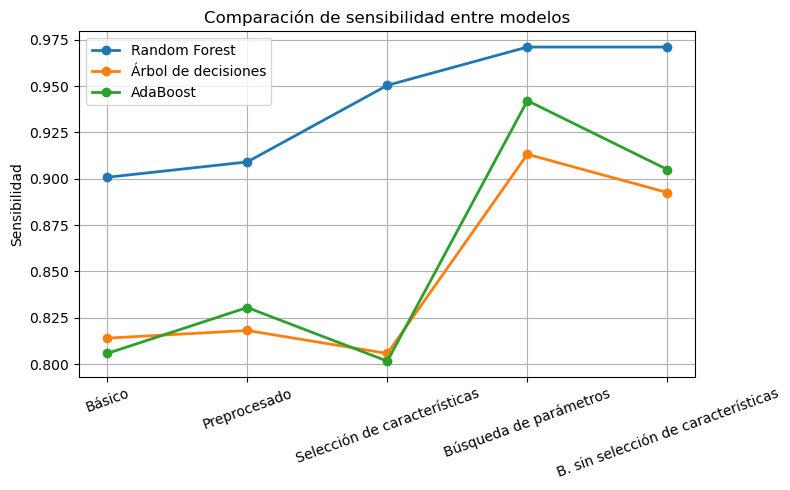

In [193]:
# Extraer la sensibilidad de cada modelo en cada etapa
sensibilidadDT = [
    scoresDTBasico[2],
    scoresDTOutliers[2],
    scoresDTSeleccion[2],
    scoresDTGridSearch[2],
    scoresDTGridSearchSinRed[2]
]
sensibilidadRF = [
    scoresRFBasico[2],
    scoresRFOutliers[2],
    scoresRFSeleccion[2],
    scoresRFGridSearch[2],
    scoresRFGridSearchSinRed[2]
]

sensibilidadAda = [
    scoresAdaBasico[2],
    scoresAdaOutliers[2],
    scoresAdaSeleccion[2],
    scoresAdaGridSearch[2],
    scoresAdaGridSearchSinRed[2]
]

nombres = [
    "Básico",
    "Preprocesado",
    "Selección de características",
    "Búsqueda de parámetros",
    "B. sin selección de características"
]

# --- Gráfica ---
plt.figure(figsize=(8,5))
plt.plot(nombres, sensibilidadRF, marker='o', linewidth=2)
plt.plot(nombres, sensibilidadDT, marker='o', linewidth=2)
plt.plot(nombres, sensibilidadAda, marker='o', linewidth=2)
plt.legend(["Random Forest", "Árbol de decisiones", "AdaBoost"])
plt.title("Comparación de sensibilidad entre modelos")
plt.ylabel("Sensibilidad")
plt.xticks(rotation=20)
plt.grid(True)
plt.tight_layout()
plt.show()

En esta comparativa se hace patente ue Random forest consigue mejores resultados durante todo el proceso en la métrica de sensibilidad, tambien es destacable que el preprocesado beneficia a todos los modelos, mientras que la selección de características solo beneficia al random forest, almenos cuando no hacemos búsqueda de hyperparámetros. Cuando hacemos búsqueda de hyper parámetros árboles de decisión y adaboost mejoran bastante entorno a un 10% mientras que random forest mejora entorno a un 2%, como ya partía de unos mejores resultados sigue siendo mejor. Si hacemos búsqueda de hyperparámetros con todas las características los modelos empeoran con respecto a la eliminación de las menos representativas. Esto indica que esta eliminación es positiva para los modelos y simplifica el problema eliminando ruido.

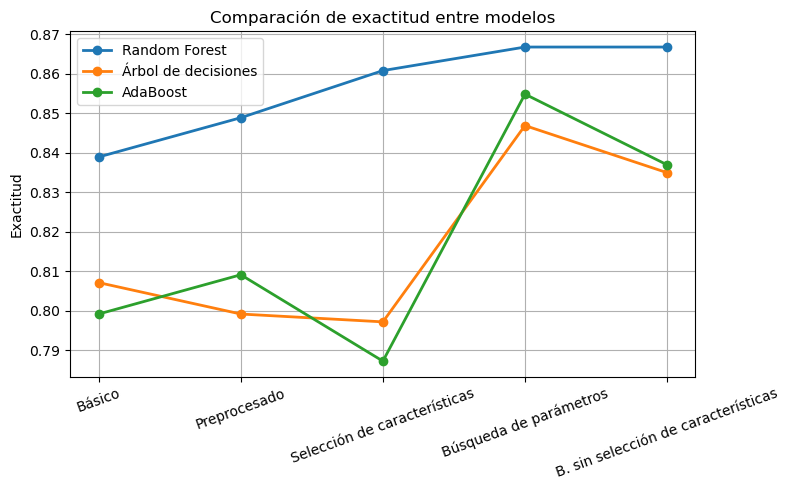

In [194]:
# Extraer la sensibilidad de cada modelo en cada etapa
exactitudDT = [
    scoresDTBasico[0],
    scoresDTOutliers[0],
    scoresDTSeleccion[0],
    scoresDTGridSearch[0],
    scoresDTGridSearchSinRed[0]
]
exactitudRF = [
    scoresRFBasico[0],
    scoresRFOutliers[0],
    scoresRFSeleccion[0],
    scoresRFGridSearch[0],
    scoresRFGridSearchSinRed[0]
]

exactitudAda = [
    scoresAdaBasico[0],
    scoresAdaOutliers[0],
    scoresAdaSeleccion[0],
    scoresAdaGridSearch[0],
    scoresAdaGridSearchSinRed[0]
]

nombres = [
    "Básico",
    "Preprocesado",
    "Selección de características",
    "Búsqueda de parámetros",
    "B. sin selección de características"
]

# --- Gráfica ---
plt.figure(figsize=(8,5))
plt.plot(nombres, exactitudRF, marker='o', linewidth=2)
plt.plot(nombres, exactitudDT, marker='o', linewidth=2)
plt.plot(nombres, exactitudAda, marker='o', linewidth=2)
plt.legend(["Random Forest", "Árbol de decisiones", "AdaBoost"])
plt.title("Comparación de exactitud entre modelos")
plt.ylabel("Exactitud")
plt.xticks(rotation=20)
plt.grid(True)
plt.tight_layout()
plt.show()

En las métricas de exactitud se aprecian resultados muy similares a la de sensibilidad encuanto a la comparación de mejoras, si que es cierto que las métricas parten desde más abajo. Y también cabe destacar que árboles de decisión empeoran los resultados en el preprocesado.

## Comparativa con la Parte 1

En los datos de prueba de la parte 1 el mejor modelo conseguía un 92% en sensibilidad y un 86% en exactitud siendo este el random forest, con los nuevos datos y el mismo preprocesado se puede conseguir un 97% en sensibilidad y un 86.7% en exactitud. Si bien la exactitud no la mejoramos demasiado, si que conseguimos mejorar la sensibilidad 5 puntos más, es decir de cada 100 casos que sufren bullying predecimos 5 más que con el otro modelo.

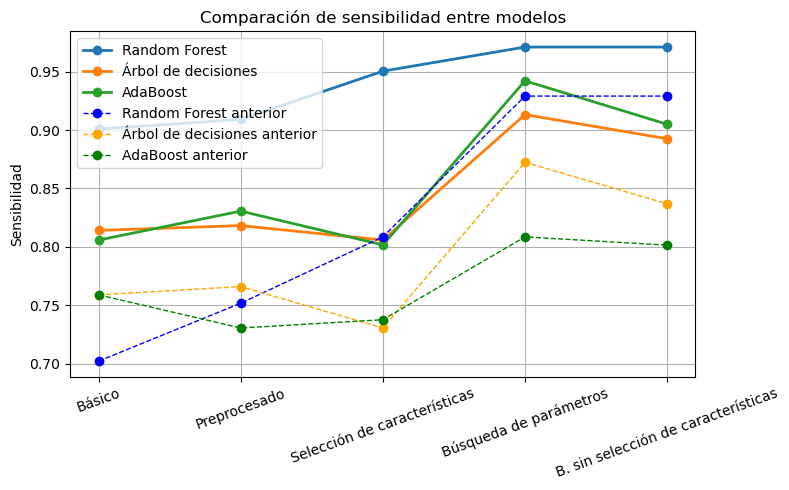

In [201]:


sensibilidad_Ada_anterior =[0.7588652482269503, 0.7304964539007093, 0.7375886524822695, 0.8085106382978723, 0.8014184397163121]

sensibilidad_RF_anterior =[0.7021276595744681, 0.75177304964539, 0.8085106382978723, 0.9290780141843972, 0.9290780141843972]

sensibilidad_DT_anterior =[0.7588652482269503, 0.7659574468085106, 0.7304964539007093, 0.8723404255319149, 0.8368794326241135]

# --- Gráfica ---
plt.figure(figsize=(8,5))
plt.plot(nombres, sensibilidadRF, marker='o', linewidth=2)
plt.plot(nombres, sensibilidadDT, marker='o', linewidth=2)
plt.plot(nombres, sensibilidadAda, marker='o', linewidth=2)
plt.plot(nombres, sensibilidad_RF_anterior, marker='o', linestyle='--', color='blue', linewidth=1)
plt.plot(nombres, sensibilidad_DT_anterior, marker='o', linestyle='--', color='orange', linewidth=1)
plt.plot(nombres, sensibilidad_Ada_anterior, marker='o', linestyle='--', color='green', linewidth=1)
plt.legend(["Random Forest", "Árbol de decisiones", "AdaBoost", "Random Forest anterior", "Árbol de decisiones anterior", "AdaBoost anterior"])
plt.title("Comparación de sensibilidad entre modelos")
plt.ylabel("Sensibilidad")
plt.xticks(rotation=20)
plt.grid(True)
plt.tight_layout()
plt.show()

Podemos ver que comparado la sensibilidad con el dataset anterior todos los modelos mejoran con respecto a sus modelos correspondientes.

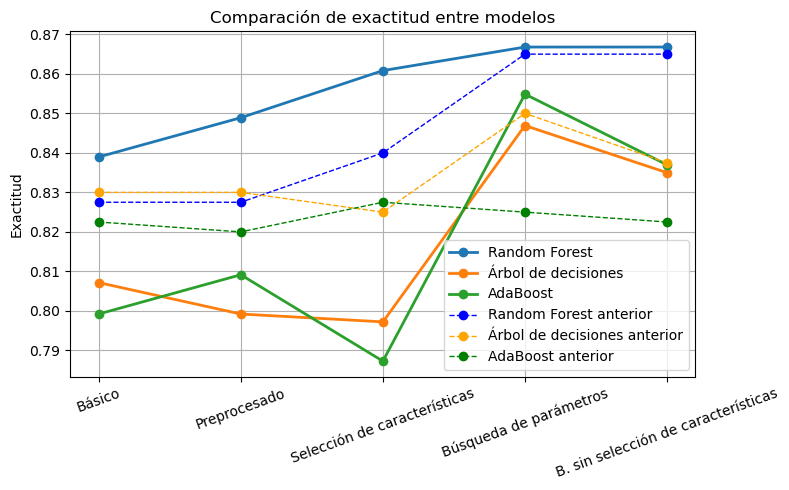

In [203]:
exactitudAda_anterior =[0.8225, 0.82, 0.8275, 0.825, 0.8225]
exactitudRF_anterior =[0.8275, 0.8275, 0.84, 0.865, 0.865]
exactitudDT_anterior =[0.83, 0.83, 0.825, 0.85, 0.8375]

plt.figure(figsize=(8,5))
plt.plot(nombres, exactitudRF, marker='o', linewidth=2)
plt.plot(nombres, exactitudDT, marker='o', linewidth=2)
plt.plot(nombres, exactitudAda, marker='o', linewidth=2)
plt.plot(nombres, exactitudRF_anterior, marker='o', linestyle='--', color='blue', linewidth=1)
plt.plot(nombres, exactitudDT_anterior, marker='o', linestyle='--', color='orange', linewidth=1)
plt.plot(nombres, exactitudAda_anterior, marker='o', linestyle='--', color='green', linewidth=1)
plt.legend(["Random Forest", "Árbol de decisiones", "AdaBoost", "Random Forest anterior", "Árbol de decisiones anterior", "AdaBoost anterior"])
plt.title("Comparación de exactitud entre modelos")
plt.ylabel("Exactitud")
plt.xticks(rotation=20)
plt.grid(True)
plt.tight_layout()
plt.show()

Si comparamos con la exactitud aquí hemos conseguido que los modelos mejoren también salvo para árboles de decisión, en este modelo era mejor la exactitud conseguida en el dataset anterior.

# Conclusión <a class="anchor" id="conclusion"></a>

Con el nuevo dataset, el modelo que obtiene el mejor rendimiento en el conjunto de test es Random Forest, alcanzando un 97% de sensibilidad, frente al 95% logrado en entrenamiento. En cuanto a la exactitud, consigue un 86% en test y un 88% en entrenamiento.

El resto de modelos mejoran en la mayoría de métricas de evaluación, excepto en la exactitud. Este comportamiento puede deberse al desbalanceo de clases, que es la principal diferencia respecto al conjunto de datos anterior.

En particular, el modelo de Random Forest permite predecir correctamente el 86% de los casos de bullying o no bullying. Además, tiende a generar más falsos positivos al tiempo que se reducen los falsos negativos, lo cual es deseable en este contexto: es preferible predecir que un alumno sufre bullying cuando no es así, que cometer el error contrario y dejar un caso sin detectar. Esta tolerancia a los falsos positivos ajusta mejor el modelo al problema que si solo se priorizara la precisión o la exactitud, métricas que permiten un número mayor de falsos negativos.

En cuanto a los demás modelos, AdaBoost y árboles de decisión muestran resultados similares entre sí. Cabe destacar que la exactitud de los árboles de decisión empeora tras el preprocesado, mientras que los otros modelos sí se benefician de este paso. También observamos que la eliminación de características solo mejora los resultados de Random Forest.

El ajuste de hiperparámetros incrementa el rendimiento de todos los modelos: aproximadamente un 10% en árboles de decisión y AdaBoost, y alrededor de un 2% en Random Forest. Este último ya partía con mejores resultados en este dataset, a diferencia del anterior donde inicialmente presentaba el peor rendimiento. La mejora adicional se debe, en parte, a que la selección de características se realiza tomando como referencia su importancia en Random Forest, lo cual podría introducir cierto sesgo hacia este modelo. Sin embargo, descartamos este sesgo al comprobar que los modelos con ajuste de hiperparámetros sin eliminación de características obtienen peores resultados que aquellos con eliminación.

Según la importancia asignada por Random Forest, las variables clave para la predicción son, en orden descendente:

1. Ansiedad 
2. Tiempo_Internet 
3. Autoestima 
4. Notas_Promedio 
5. Tiempo_Redes 
6. Horas_Sueno 
7. Numero_Amigos 
8. Conflictos_Familiares 
9. Depresion 
10. Actividad_Fisica 
11. Tiempo_Videojuegos 
12. Ausencias_Escolares 
13. Edad 
14. Actividades_Extracurr 
15. Tipo_Centro_Publico 
16. Genero_Masculino 

Las características más influyentes son ``Ansiedad``, ``Tiempo_Internet``, ``Autoestima``, ``Notas_Promedio`` y ``Tiempo_Redes``. Las que menos aportan al modelo son ``Genero_Masculino``, ``Tipo_Centro_Publico``, ``Actividades_Extracurr``, ``Edad`` y ``Ausencias_Escolares``.

En caso de tener que priorizar qué datos recopilar, deberían emplearse principalmente las variables del Top 5, ya que concentran la mayor capacidad predictiva.


A continuación mostramos una tabla con los resultados de mejor a peor de los modelos:

| Etapa                                     | Mejor → Peor                              |
|-------------------------------------------|--------------------------------------------|
| Preprocesado básico                       | Random Forest > Decision Tree > AdaBoost   |
| Preprocesado completo                     | Random Forest > AdaBoost > Decision Tree    |
| Selección de características               | Random Forest > Decision Tree ≈ AdaBoost    |
| Búsqueda de hiperparámetros (Randomized)          | Random Forest > AdaBoost > Decision Tree   |
| Búsqueda de hiperparámetros (Randomized) sin selección de características  | Random Forest > AdaBoost > Decision Tree   |


# Consultas IA Generativa <a class="anchor" id="ia-generativa"></a>



**Prompt:** Apartir del siguiente código para selección de características, genera un bucle que aplique el algoritmo con cada número de variables, genera una visualización para cada número de variables con la sensibilidad. Para aplicar el método del codo para la selección de características.
```Python
from sklearn.pipeline import Pipeline 
from sklearn.feature_selection 
import RFE 
n_features_to_select = 3
rfe = RFE(RandomForestClassifier(random_state=semilla), n_features_to_select=n_features_to_select) 
model = RandomForestClassifier(random_state=semilla)
pipeline = Pipeline(steps=[('s',rfe),('m',model)])

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X_train, y_train, scoring='recall', cv=cv, n_jobs=-1)
print('Sensibilidad: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
```

**Respuesta:**
```Python
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

semilla = 42
resultados = []
num_features = []

# Número total de características
total_features = X_train.shape[1]

# Evaluamos desde 1 hasta todas las variables
for k in range(1, total_features + 1):

    # RFE seleccionando k características
    rfe = RFE(RandomForestClassifier(random_state=semilla),
              n_features_to_select=k)

    # Pipeline: RFE + modelo final
    model = RandomForestClassifier(random_state=semilla)
    pipeline = Pipeline([('rfe', rfe), ('model', model)])

    # Validación cruzada
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=semilla)
    scores = cross_val_score(pipeline, X_train, y_train, scoring='recall',
                             cv=cv, n_jobs=-1)

    resultados.append(np.mean(scores))
    num_features.append(k)

    print(f"Características: {k}, Sensibilidad: {np.mean(scores):.4f}")

# --- Gráfica del método del codo ---
plt.figure(figsize=(8,5))
plt.plot(num_features, resultados, marker='o')
plt.xlabel("Número de características seleccionadas (k)")
plt.ylabel("Sensibilidad (Recall)")
plt.title("Método del codo para selección de características (RFE)")
plt.grid(True)
plt.show()
```

**Validación y cambios:** De este resultado se modifico para utilizar 2 métricas y se comprobo que se ajustaba al código original que se le paso como base.

**Prompt:** haz un viisualización de mathplotlib con el istograma de bulliying2['Autoestima'] y bulliying2['Ansiedad']
**Respuesta:** 
```Python
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Histograma de Autoestima
plt.subplot(1,2,1)
plt.hist(bullying2['Autoestima'], bins=20, edgecolor='black')
plt.title("Histograma de Autoestima")
plt.xlabel("Autoestima")
plt.ylabel("Frecuencia")
plt.grid(alpha=0.3)

# Histograma de Ansiedad
plt.subplot(1,2,2)
plt.hist(bullying2['Ansiedad'], bins=20, edgecolor='black', color='orange')
plt.title("Histograma de Ansiedad")
plt.xlabel("Ansiedad")
plt.ylabel("Frecuencia")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

```


# Entorno de Ejecución <a class="anchor" id="entorno"></a>

In [55]:
import sklearn
sklearn.show_versions()


System:
    python: 3.11.7 | packaged by conda-forge | (main, Dec 23 2023, 14:27:59) [MSC v.1937 64 bit (AMD64)]
executable: c:\Users\AntonioLuisTorres\.conda\envs\NuCLS-tfg\python.exe
   machine: Windows-10-10.0.19045-SP0

Python dependencies:
      sklearn: 1.7.2
          pip: 24.0
   setuptools: 69.0.3
        numpy: 1.26.3
        scipy: 1.12.0
       Cython: 3.0.8
       pandas: 2.2.0
   matplotlib: 3.8.2
       joblib: 1.3.2
threadpoolctl: 3.3.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: mkl
    num_threads: 6
         prefix: libblas
       filepath: C:\Users\AntonioLuisTorres\.conda\envs\NuCLS-tfg\Library\bin\libblas.dll
        version: 2024.0-Product
threading_layer: intel

       user_api: openmp
   internal_api: openmp
    num_threads: 12
         prefix: vcomp
       filepath: C:\Users\AntonioLuisTorres\.conda\envs\NuCLS-tfg\vcomp140.dll
        version: None

       user_api: openmp
   internal_api: openmp
    num_threads: 12
  

In [56]:
from sinfo import sinfo

sinfo()

-----
matplotlib  3.8.2
numpy       1.26.3
pandas      2.2.0
scipy       1.12.0
sinfo       0.3.1
sklearn     1.7.2
-----
IPython             8.22.1
jupyter_client      8.6.0
jupyter_core        5.7.1
jupyterlab          4.1.2
notebook            7.1.1
-----
Python 3.11.7 | packaged by conda-forge | (main, Dec 23 2023, 14:27:59) [MSC v.1937 64 bit (AMD64)]
Windows-10-10.0.19045-SP0
12 logical CPU cores, Intel64 Family 6 Model 165 Stepping 2, GenuineIntel
-----
Session information updated at 2025-11-20 00:41
